In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Optional: better visuals
sns.set(style="whitegrid")


# 2D Pinns Stepped variant

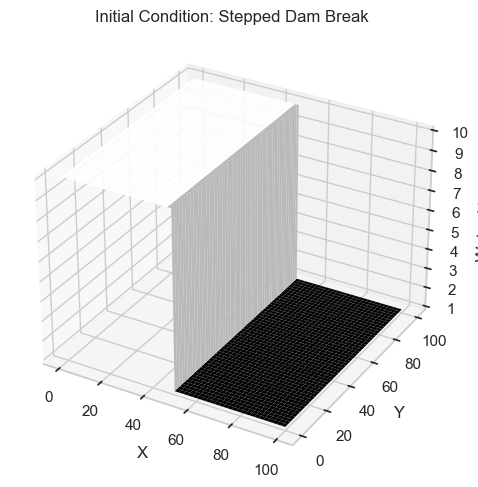

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def func_IC_h(x):
    h_r = 10.0  # Height on the right side
    h_l = 1.0  # Height on the left side
    return np.where(x[:, 0:1] <= 50, h_r, h_l)

# Create grid
N = 500
X, Y = np.meshgrid(np.linspace(0, 100, N), np.linspace(0, 100, N))
XY = np.column_stack((X.ravel(), Y.ravel()))
T = np.zeros_like(XY[:, :1])
Q = np.hstack((XY, T))

# Evaluate initial condition
H = func_IC_h(Q).reshape(N, N)

# 3D surface plot
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, H, cmap='gray', edgecolor='none')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Water Height')
ax.set_title('Initial Condition: Stepped Dam Break')
plt.tight_layout()
plt.show()


Load CSV Files

In [4]:
df1 = pd.read_csv("Downloads/solution_outputs_2dstep/training_loss_2dstep.csv")


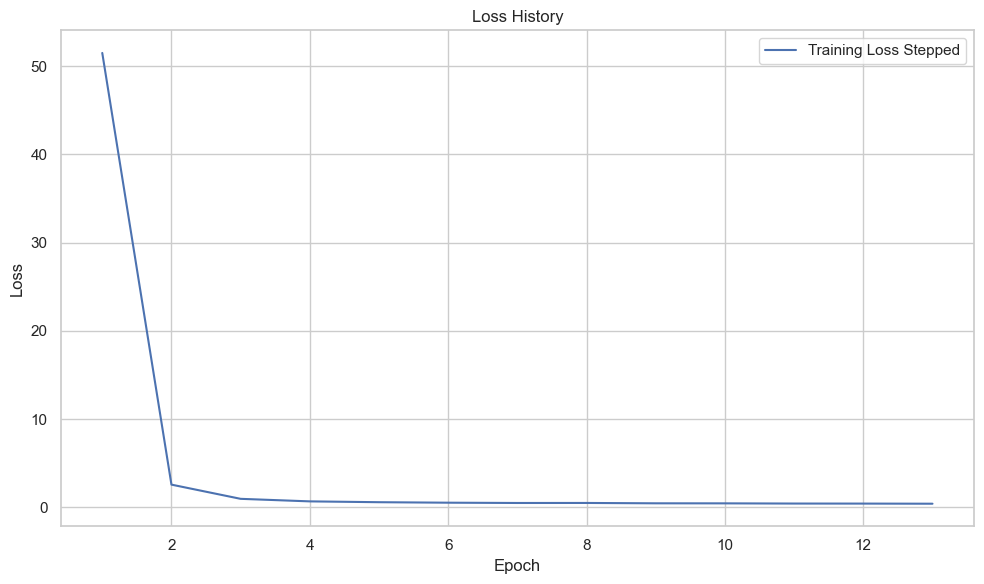

In [5]:
plt.figure(figsize=(10, 6))

plt.plot(df1["Step"], df1["Loss"], label="Training Loss Stepped")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss History")
plt.legend()
plt.tight_layout()
plt.show()


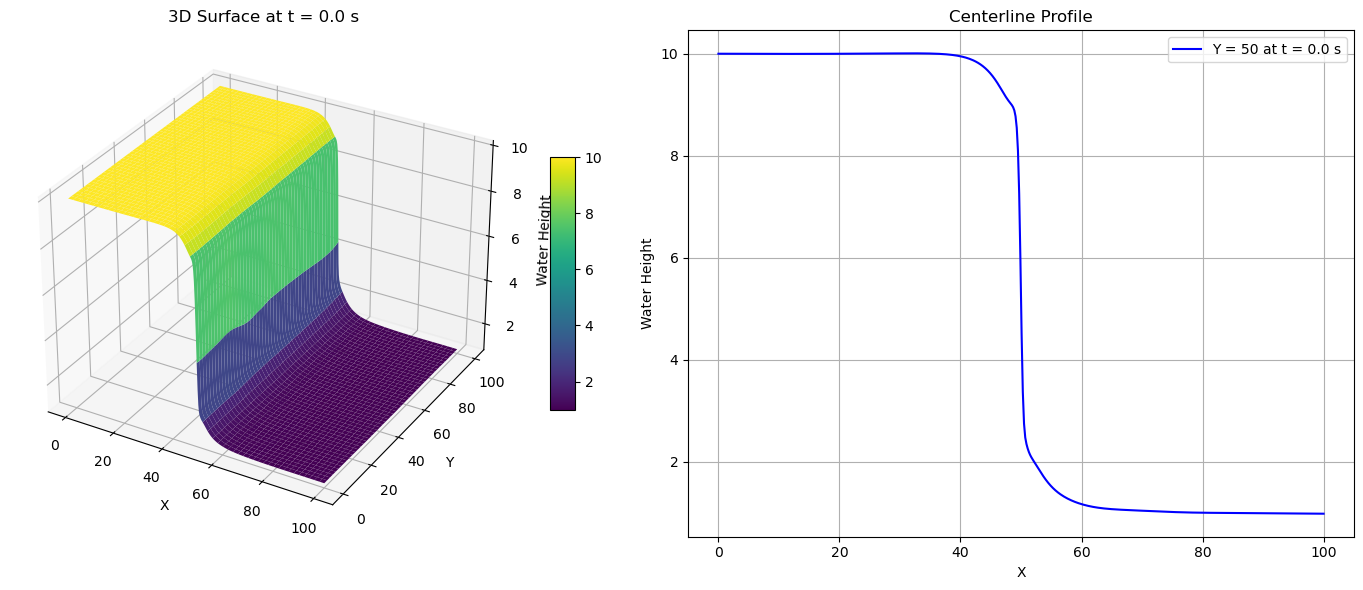

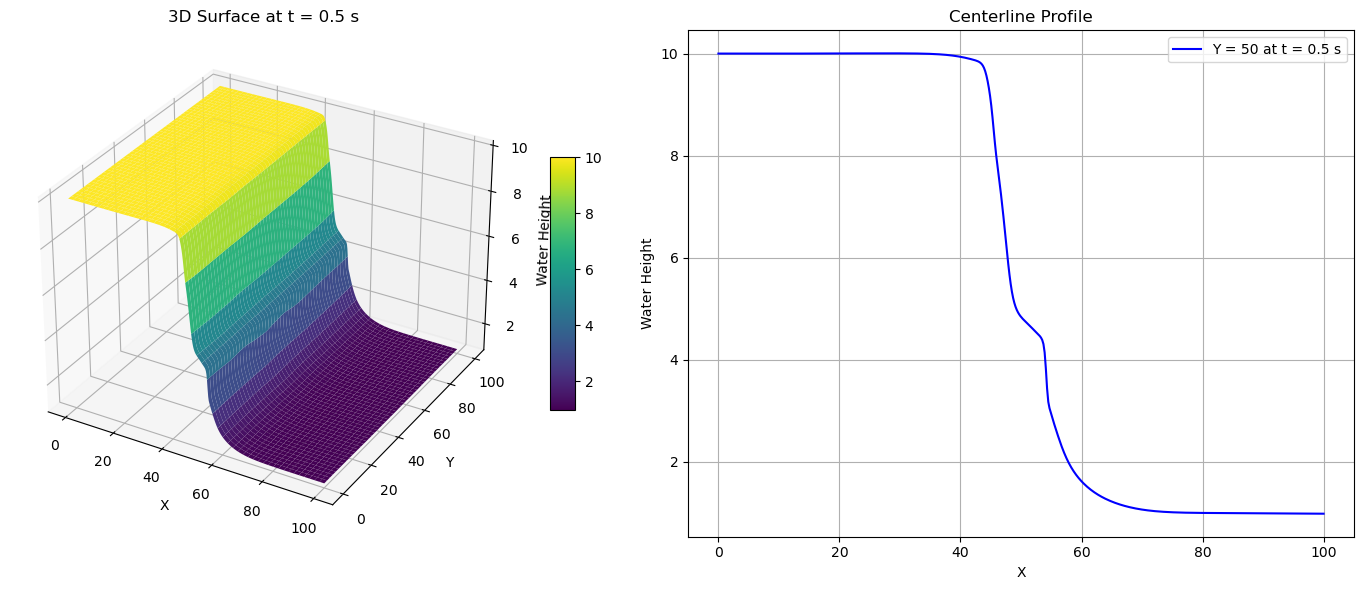

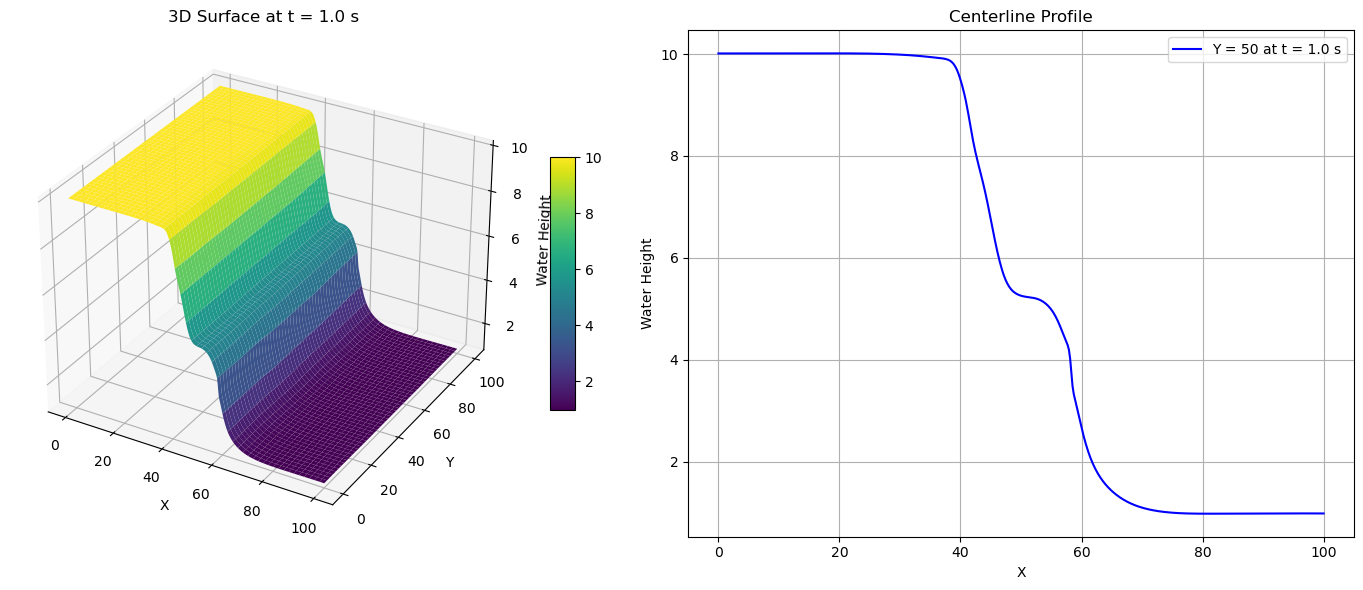

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# List of file names and their corresponding time values (for titles)
files = [
    ("Downloads/solution_outputs_2dstep/2dstep_t0.00.csv", 0.0),
    ("Downloads/solution_outputs_2dstep/2dstep_t0.50.csv", 0.5),
    ("Downloads/solution_outputs_2dstep/2dstep_t1.00.csv", 1.0)
]

for file_path, time_val in files:
    Z = pd.read_csv(file_path).values
    N_y, N_x = Z.shape
    x = np.linspace(0, 100, N_x)
    y = np.linspace(0, 100, N_y)
    X, Y = np.meshgrid(x, y)

    center_y_idx = np.argmin(np.abs(y - 50))
    centerline = Z[center_y_idx, :]

    fig = plt.figure(figsize=(14, 6))

    # Surface
    ax1 = fig.add_subplot(121, projection='3d')
    surf = ax1.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Water Height')
    ax1.set_title(f"3D Surface at t = {time_val:.1f} s")
    fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=10)

    # Centerline
    ax2 = fig.add_subplot(122)
    ax2.plot(x, centerline, 'b', label=f"Y = 50 at t = {time_val:.1f} s")
    ax2.set_xlabel('X')
    ax2.set_ylabel('Water Height')
    ax2.set_title("Centerline Profile")
    ax2.grid(True)
    ax2.legend()

    plt.tight_layout()
    plt.show()

# Stepped Numerical results

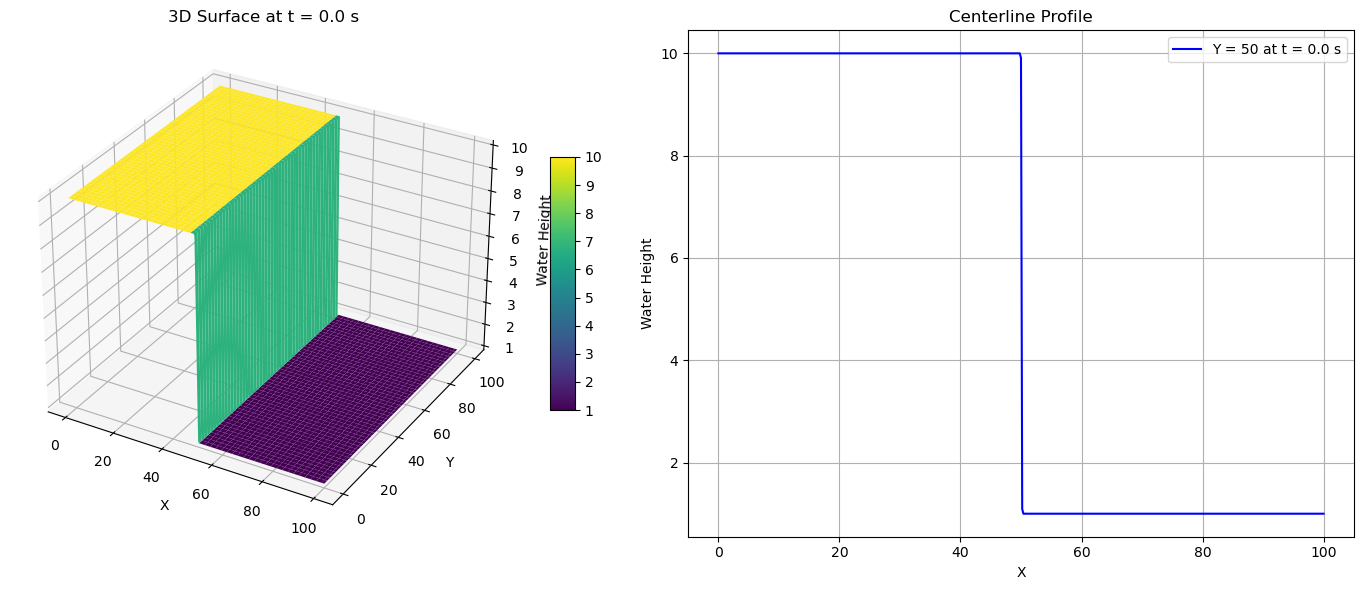

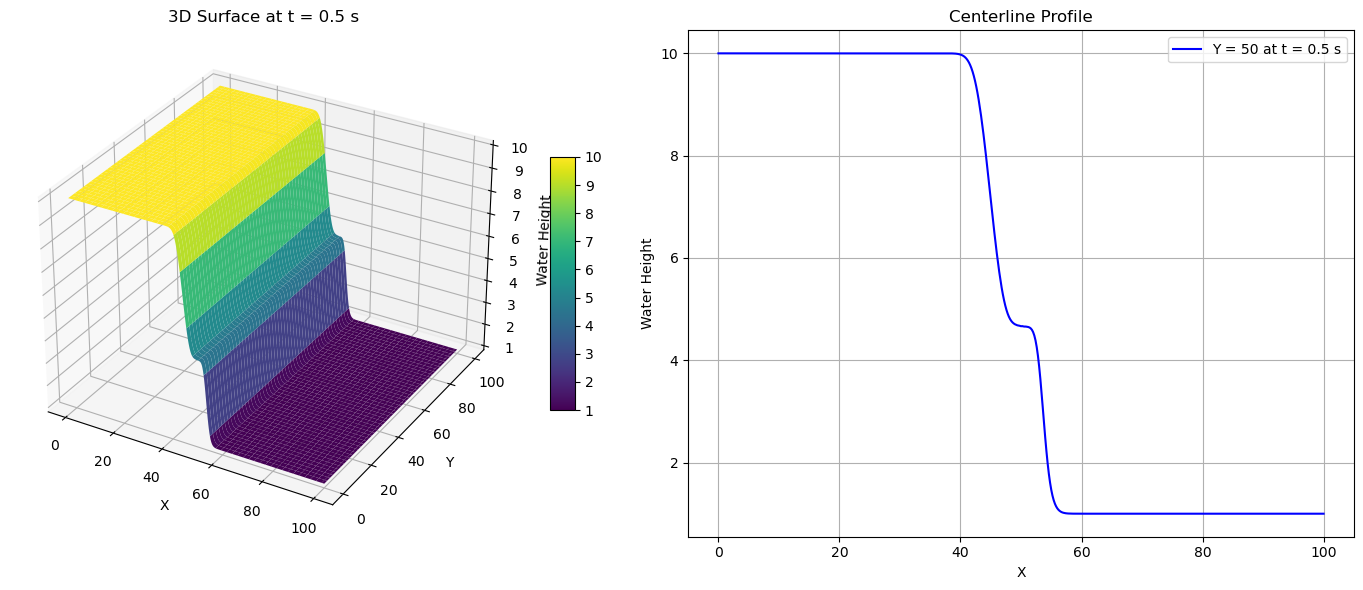

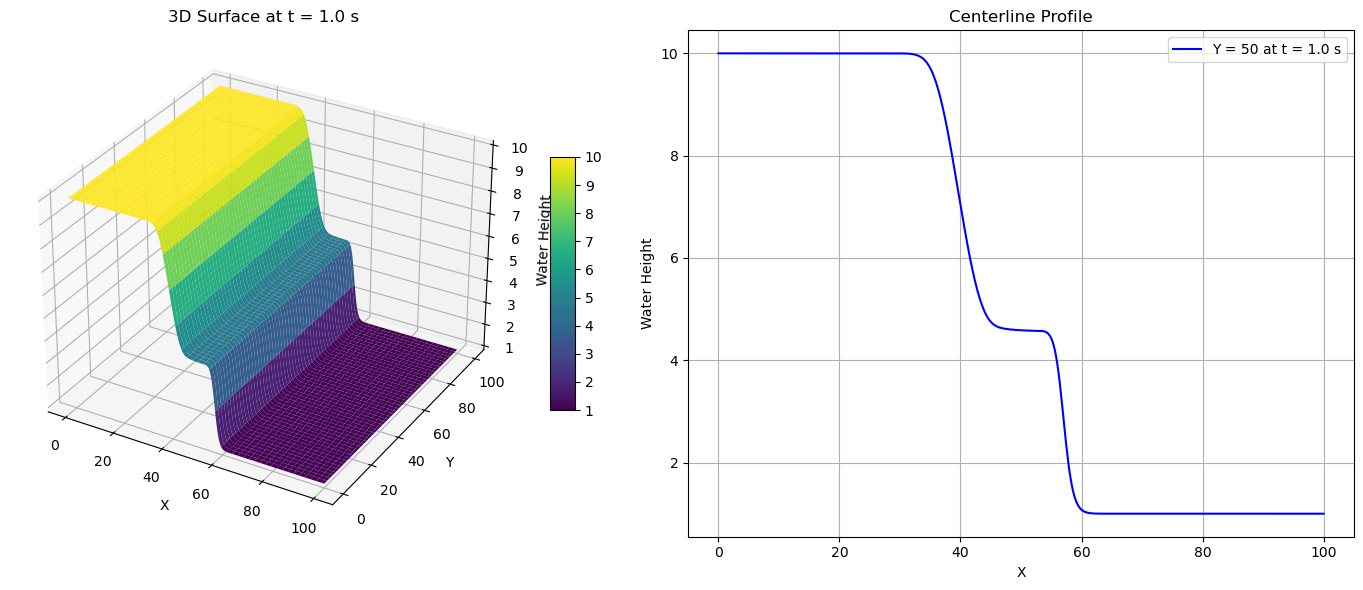

In [22]:
# List of file names and their corresponding time values (for titles)
files = [
    ("Downloads/solution_outputs_stepped_numerical/stepped_numerical_t0.0000.csv", 0.0),
    ("Downloads/solution_outputs_stepped_numerical/stepped_numerical_t0.5000.csv", 0.5),
    ("Downloads/solution_outputs_stepped_numerical/stepped_numerical_t1.0000.csv", 1.0)
]

for file_path, time_val in files:
    Z = pd.read_csv(file_path).values
    N_y, N_x = Z.shape
    x = np.linspace(0, 100, N_x)
    y = np.linspace(0, 100, N_y)
    X, Y = np.meshgrid(x, y)

    center_y_idx = np.argmin(np.abs(y - 50))
    centerline = Z[center_y_idx, :]

    fig = plt.figure(figsize=(14, 6))

    # Surface
    ax1 = fig.add_subplot(121, projection='3d')
    surf = ax1.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Water Height')
    ax1.set_title(f"3D Surface at t = {time_val:.1f} s")
    fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=10)

    # Centerline
    ax2 = fig.add_subplot(122)
    ax2.plot(x, centerline, 'b', label=f"Y = 50 at t = {time_val:.1f} s")
    ax2.set_xlabel('X')
    ax2.set_ylabel('Water Height')
    ax2.set_title("Centerline Profile")
    ax2.grid(True)
    ax2.legend()

    plt.tight_layout()
    plt.show()

# Stepped variant Error distribution

RMSE between PINN and reference at t = 0.5s: 12.769202549580754


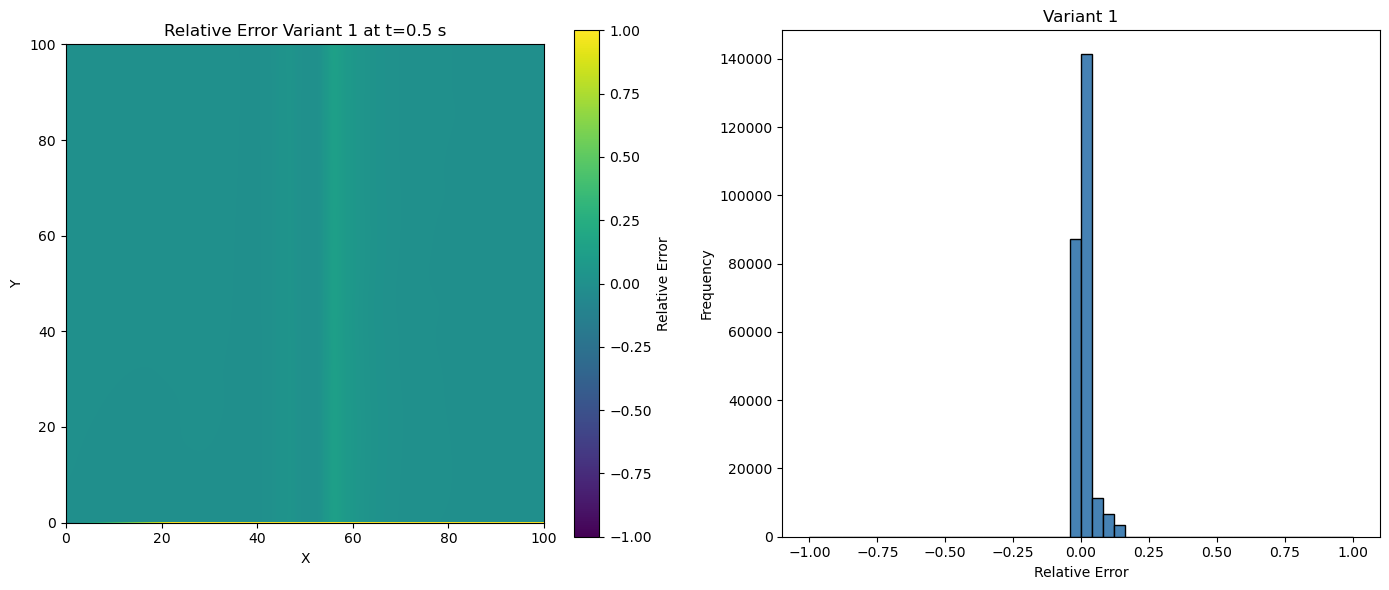

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator

# Load predicted and reference data
pred = pd.read_csv("Downloads/solution_outputs_2dstep/2dstep_t0.50.csv", header=None).values
ref = pd.read_csv("Downloads/solution_outputs_stepped_numerical/stepped_numerical_t0.5000.csv", header=None).values

# Define prediction grid
Ny, Nx = pred.shape
x_pred = np.linspace(0, 100, Nx)
y_pred = np.linspace(0, 100, Ny)
X_pred, Y_pred = np.meshgrid(x_pred, y_pred)
coords = np.column_stack((Y_pred.ravel(), X_pred.ravel()))

# Define reference grid and interpolate
Ny_ref, Nx_ref = ref.shape
x_ref = np.linspace(0, 100, Nx_ref)
y_ref = np.linspace(0, 100, Ny_ref)
interp_func = RegularGridInterpolator((y_ref, x_ref), ref, bounds_error=False, fill_value=None)
ref_interp = interp_func(coords).reshape(pred.shape)
#abs_error = np.abs(pred - ref_interp)
# Compute relative error
rel_error = np.where(ref_interp != 0, (pred - ref_interp) / ref_interp * 10e-2, 0)
rmse = np.sqrt(np.mean((pred - ref_interp)**2))
print("RMSE between PINN and reference at t = 0.5s:", rmse)

# Create combined figure
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# --- Plot 1: Heatmap of relative error ---
c1 = axs[0].imshow(rel_error, origin='lower', cmap='viridis', extent=[0, 100, 0, 100], vmin=-1, vmax=1)
fig.colorbar(c1, ax=axs[0], label='Relative Error')
axs[0].set_title("Relative Error Variant 1 at t=0.5 s")
axs[0].set_xlabel("X")
axs[0].set_ylabel("Y")

# --- Plot 2: Histogram of relative errors ---
flat_error = rel_error.ravel()
axs[1].hist(flat_error, bins=50, range=(-1, 1), color='steelblue', edgecolor='black')
axs[1].set_title("Variant 1")
axs[1].set_xlabel("Relative Error")
axs[1].set_ylabel("Frequency")

# Adjust layout and save
plt.tight_layout()
plt.savefig("error_plot_variant1.png", dpi=300)  # 🔽 Save as PNG
plt.show()


# 2D Pinns Rectangular variant

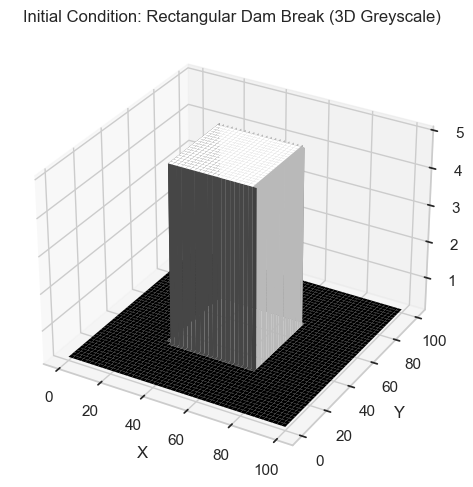

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define rectangular dam initial condition
def func_IC_h(x):
    rect_x_min, rect_x_max = 30.0, 70.0
    rect_y_min, rect_y_max = 30.0, 70.0
    inside = (x[:, 0:1] >= rect_x_min) & (x[:, 0:1] <= rect_x_max) & \
             (x[:, 1:2] >= rect_y_min) & (x[:, 1:2] <= rect_y_max)
    return 5.0 * inside + 0.2 * ~inside

# Create grid
N = 500
X, Y = np.meshgrid(np.linspace(0, 100, N), np.linspace(0, 100, N))
XY = np.column_stack((X.ravel(), Y.ravel()))
T = np.zeros_like(XY[:, :1])
Q = np.hstack((XY, T))

# Evaluate initial condition
H = func_IC_h(Q).reshape(N, N)

# 3D surface plot
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, H, cmap='gray', edgecolor='none')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Water Height')
ax.set_title('Initial Condition: Rectangular Dam Break (3D Greyscale)')
plt.tight_layout()
plt.show()


Training Loss

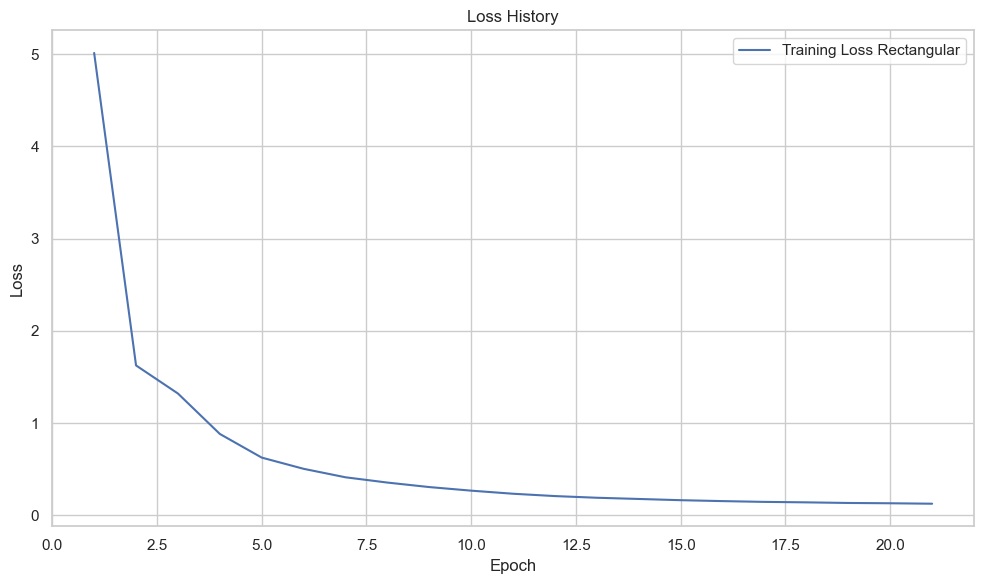

In [28]:
df2 = pd.read_csv("Downloads/solution_outputs_rec/training_loss_rec.csv")
plt.figure(figsize=(10, 6))

plt.plot(df2["Step"], df2["Loss"], label="Training Loss Rectangular")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss History")
plt.legend()
plt.tight_layout()
plt.show()

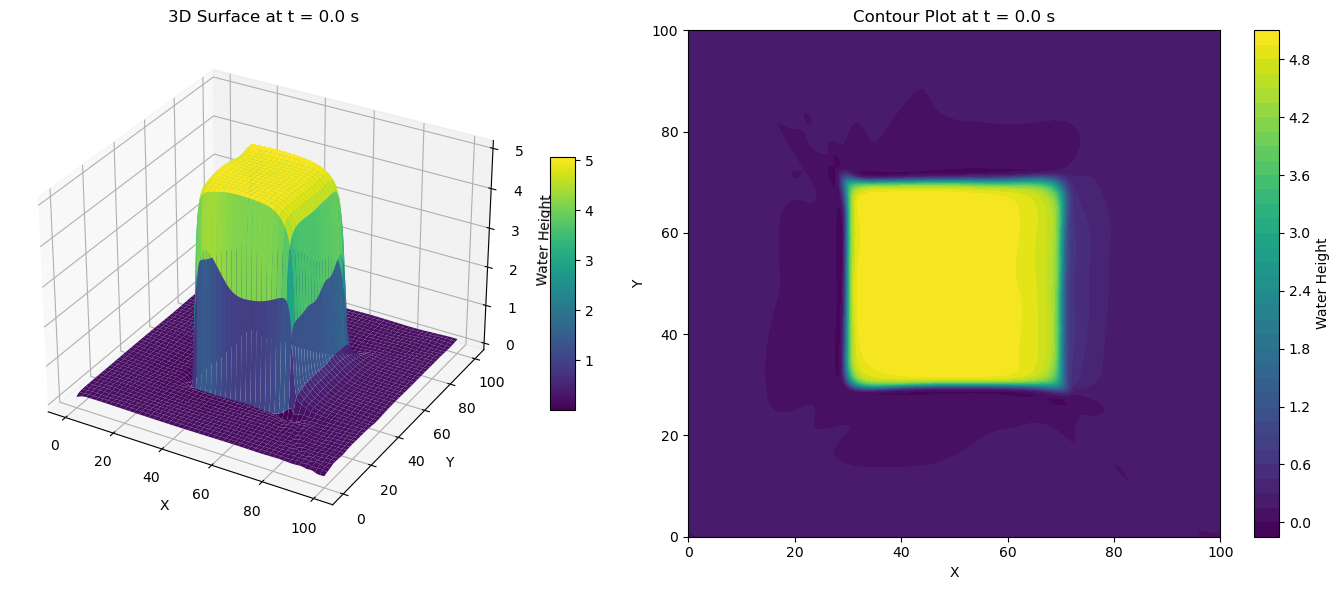

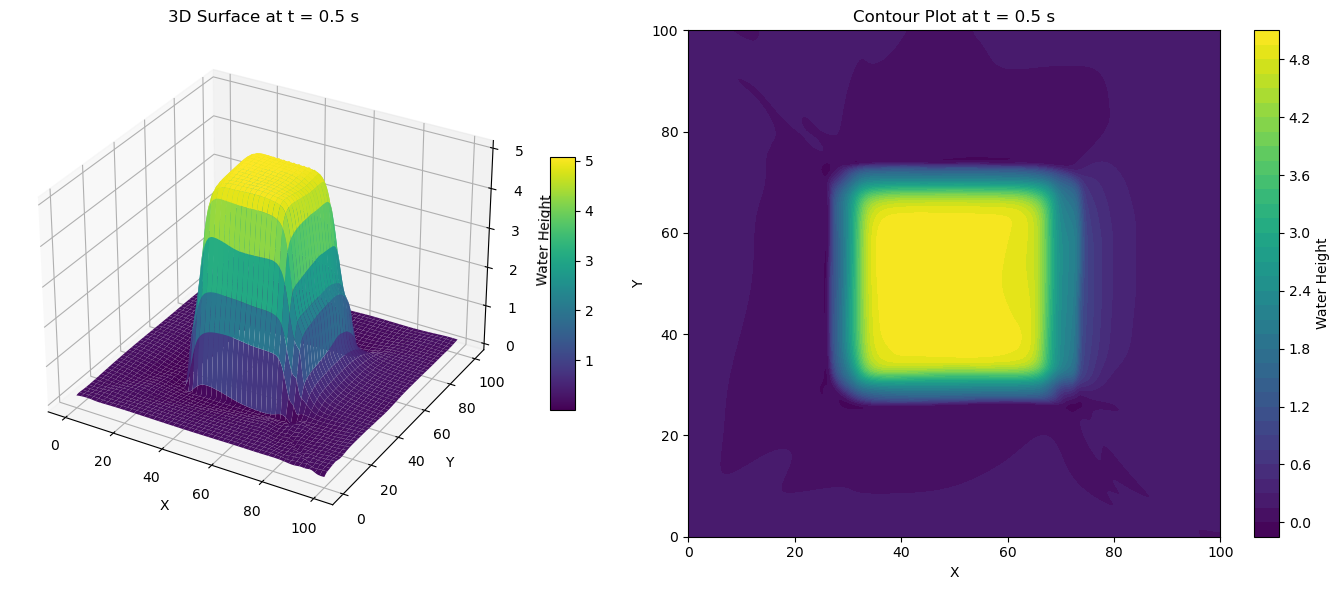

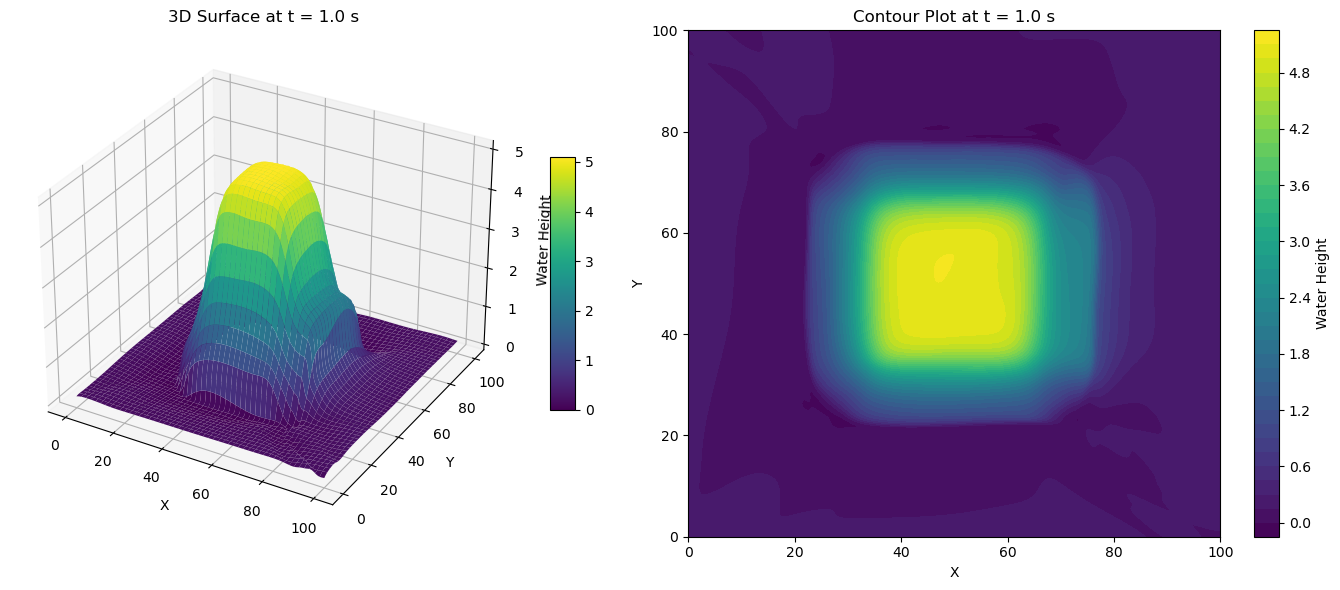

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# List of file names and their corresponding time values (for titles)
files = [
    ("Downloads/solution_outputs_rec/height_rectangle_t0.00.csv", 0.0),
    ("Downloads/solution_outputs_rec/height_rectangle_t0.50.csv", 0.5),
    ("Downloads/solution_outputs_rec/height_rectangle_t1.00.csv", 1.0)
]

for file_path, time_val in files:
    Z = pd.read_csv(file_path).values
    N_y, N_x = Z.shape
    x = np.linspace(0, 100, N_x)
    y = np.linspace(0, 100, N_y)
    X, Y = np.meshgrid(x, y)

    center_y_idx = np.argmin(np.abs(y - 50))
    centerline = Z[center_y_idx, :]

    fig = plt.figure(figsize=(14, 6))

    # 3D surface plot
    ax1 = fig.add_subplot(121, projection='3d')
    surf = ax1.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Water Height')
    ax1.set_title(f"3D Surface at t = {time_val:.1f} s")
    fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=10)

    # 2D contour plot (heatmap)
    ax2 = fig.add_subplot(122)
    contour = ax2.contourf(X, Y, Z, levels=50, cmap='viridis')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_title(f"Contour Plot at t = {time_val:.1f} s")
    fig.colorbar(contour, ax=ax2, label='Water Height')

    plt.tight_layout()
    plt.show()
    
    

# Numerical Rectangular results

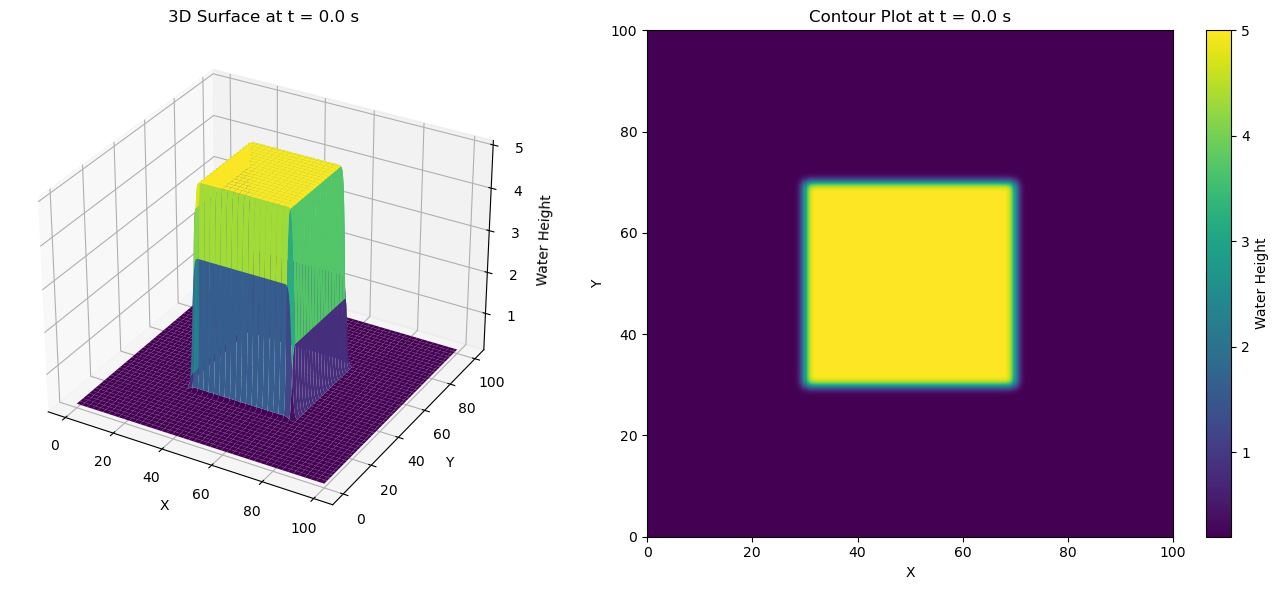

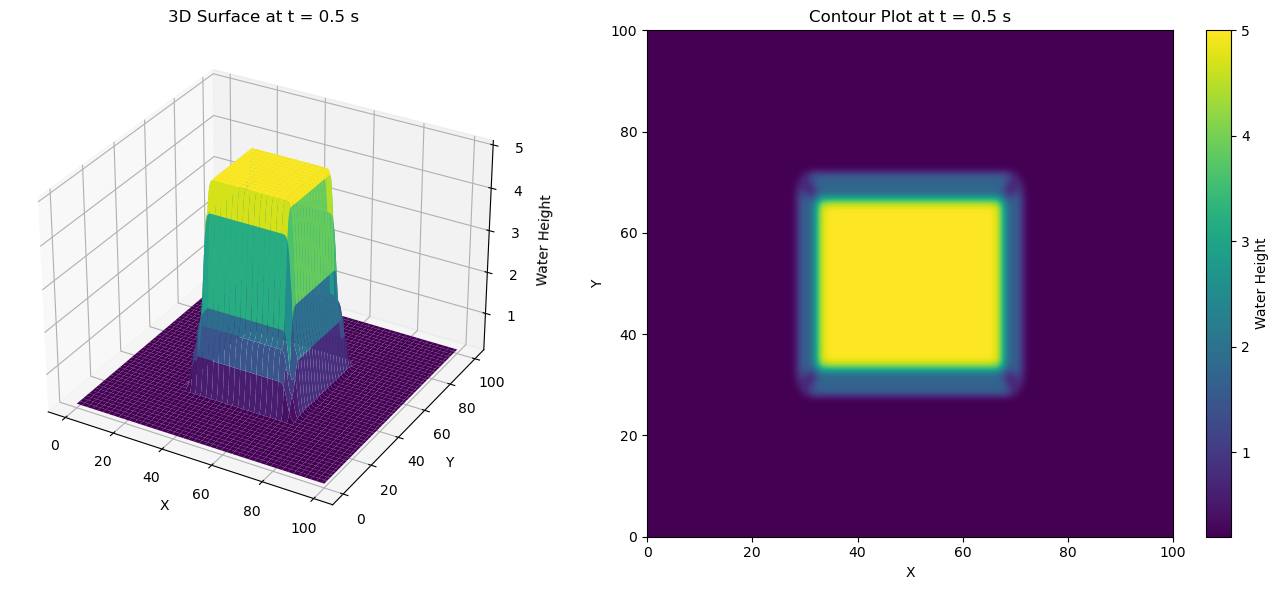

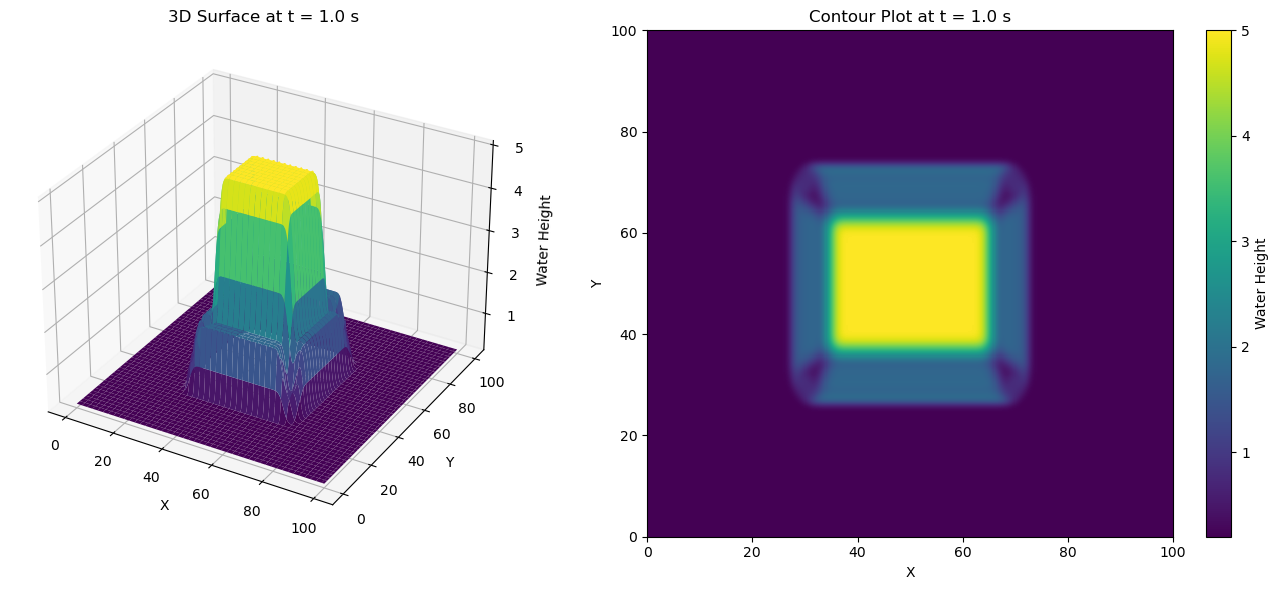

In [16]:
 # List of file names and their corresponding time values (for titles)
files = [
    ("Downloads/solution_outputs_rectangular_numerical/rectangular_t0.0000.csv", 0.0),
    ("Downloads/solution_outputs_rectangular_numerical/rectangular_t0.5000.csv", 0.5),
    ("Downloads/solution_outputs_rectangular_numerical/rectangular_t1.0000.csv", 1.0)
]

for file_path, time_val in files:
    Z = pd.read_csv(file_path).values
    N_y, N_x = Z.shape
    x = np.linspace(0, 100, N_x)
    y = np.linspace(0, 100, N_y)
    X, Y = np.meshgrid(x, y)


    fig = plt.figure(figsize=(14, 6))

        # 3D Surface Plot
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax1.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
    ax1.set_title(f"3D Surface at t = {time_val:.1f} s")
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Water Height')

        # Heatmap Plot (with imshow)
    ax2 = fig.add_subplot(1, 2, 2)
    im = ax2.imshow(Z, extent=[0, 100, 0, 100], origin='lower',
                cmap='viridis', aspect='auto', interpolation='none')

    plt.colorbar(im, ax=ax2, label='Water Height')
    ax2.set_title(f"Contour Plot at t = {time_val:.1f} s")
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.grid(False)

    plt.tight_layout()

    plt.show()


RMSE between PINN and reference at t = 0.5s: 12.874319757425576


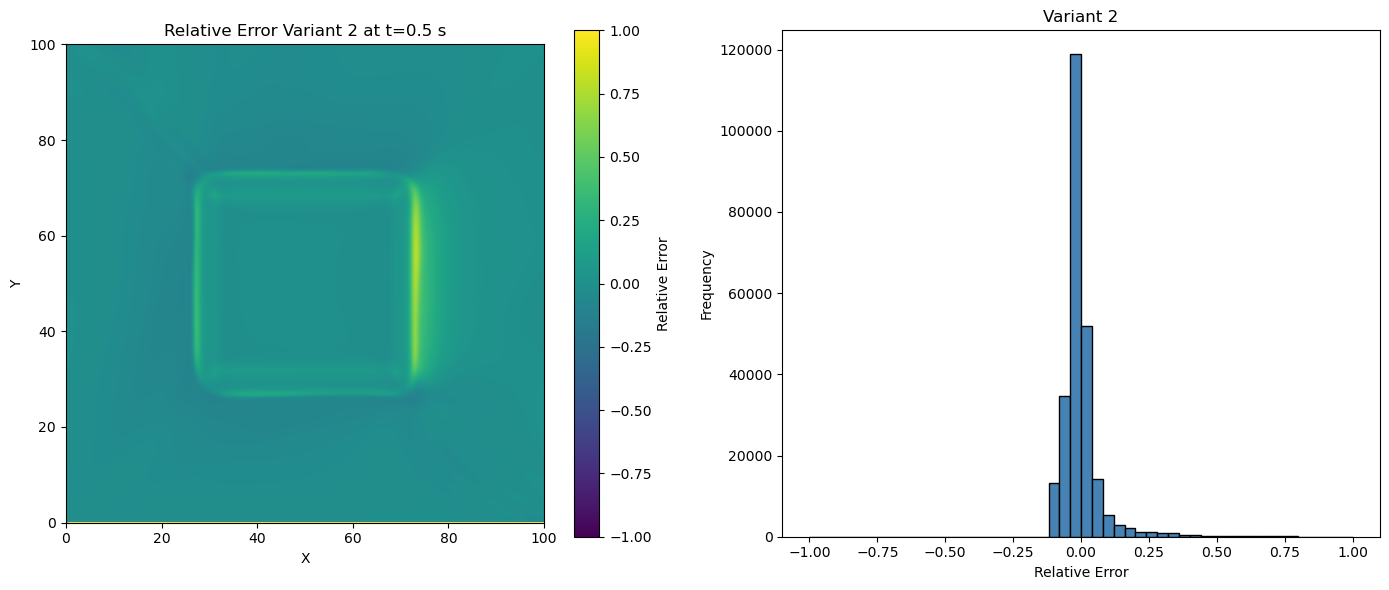

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator
# Load predicted height from PINN
pred = pd.read_csv("Downloads/solution_outputs_rec/height_rectangle_t0.50.csv", header=None).values

# Load reference solution
ref = pd.read_csv("Downloads/solution_outputs_rectangular_numerical/rectangular_t0.5000.csv", header=None).values

Ny, Nx = pred.shape
x_pred = np.linspace(0, 100, Nx)
y_pred = np.linspace(0, 100, Ny)

# Create meshgrid of predicted grid
X_pred, Y_pred = np.meshgrid(x_pred, y_pred)
coords = np.column_stack((Y_pred.ravel(), X_pred.ravel()))
# Define grid for reference (same domain assumed)
Ny_ref, Nx_ref = ref.shape
x_ref = np.linspace(0, 100, Nx_ref)
y_ref = np.linspace(0, 100, Ny_ref)

# Create interpolation function
interp_func = RegularGridInterpolator((y_ref, x_ref), ref, bounds_error=False, fill_value=None)

# 4. Interpolate reference values to prediction grid
ref_interp = interp_func(coords).reshape(pred.shape)

# 5. Now compute error
#abs_error = np.abs(pred - ref_interp)

rel_error = np.where(ref_interp != 0, (pred - ref_interp) / ref_interp * 10e-2, 0)

# Compute RMSE
rmse = np.sqrt(np.mean((pred - ref_interp)**2))
print("RMSE between PINN and reference at t = 0.5s:", rmse)

# Create combined figure
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# --- Plot 1: Heatmap of relative error ---
c1 = axs[0].imshow(rel_error, origin='lower', cmap='viridis', extent=[0, 100, 0, 100], vmin=-1, vmax=1)
fig.colorbar(c1, ax=axs[0], label='Relative Error')
axs[0].set_title("Relative Error Variant 2 at t=0.5 s")
axs[0].set_xlabel("X")
axs[0].set_ylabel("Y")

# --- Plot 2: Histogram of relative errors ---
flat_error = rel_error.ravel()
axs[1].hist(flat_error, bins=50, range=(-1, 1), color='steelblue', edgecolor='black')
axs[1].set_title("Variant 2")
axs[1].set_xlabel("Relative Error")
axs[1].set_ylabel("Frequency")

# Adjust layout and save
plt.tight_layout()
plt.savefig("error_plot_variant2.png", dpi=300)  # 🔽 Save as PNG
plt.show()

# 2D Pinns Gaussian variant

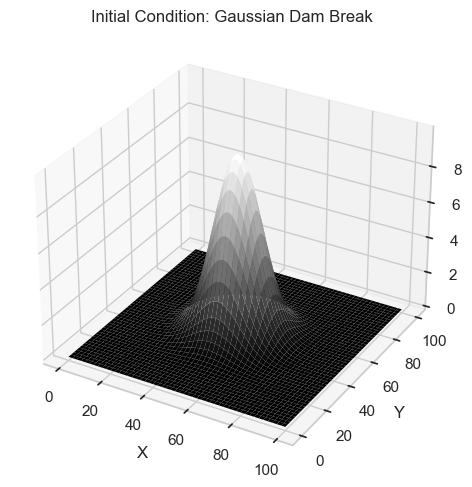

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def func_IC_h(x):
    center_x, center_y = 50.0, 50.0
    sigma = 10.0
    return np.expand_dims(
        10.0 * np.exp(-((x[:, 0] - center_x)**2 + (x[:, 1] - center_y)**2) / (2 * sigma**2)),
        axis=1)

# Create grid
N = 500
X, Y = np.meshgrid(np.linspace(0, 100, N), np.linspace(0, 100, N))
XY = np.column_stack((X.ravel(), Y.ravel()))
T = np.zeros_like(XY[:, :1])
Q = np.hstack((XY, T))

# Evaluate initial condition
H = func_IC_h(Q).reshape(N, N)

# 3D surface plot
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, H, cmap='gray', edgecolor='none')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Water Height')
ax.set_title('Initial Condition: Gaussian Dam Break')
plt.tight_layout()
plt.show()


Loss

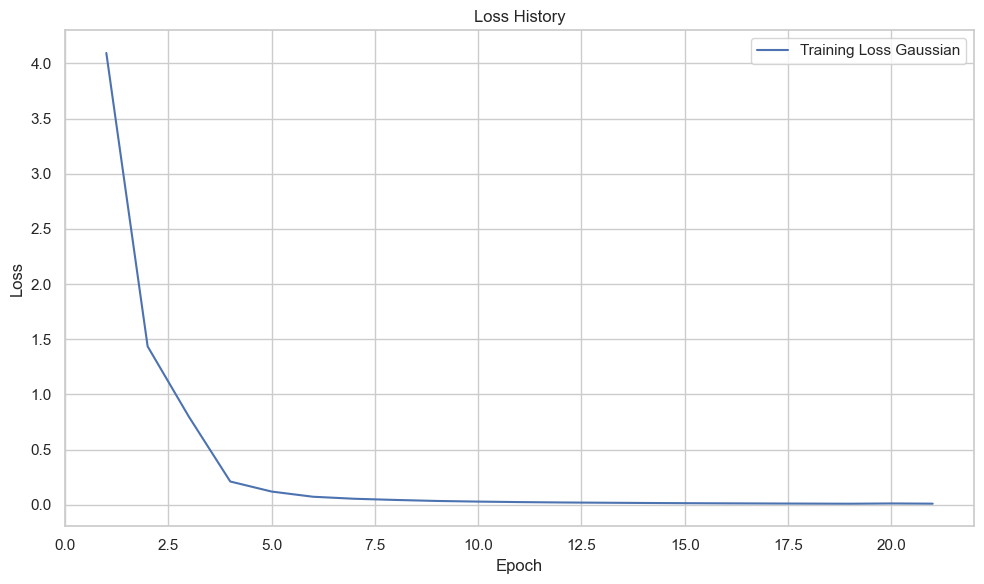

In [29]:
df3 = pd.read_csv("Downloads/solution_outputs_gaussian/training_loss_gaussian.csv")
plt.figure(figsize=(10, 6))

plt.plot(df3["Step"], df3["Loss"], label="Training Loss Gaussian")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss History")
plt.legend()
plt.tight_layout()
plt.show()

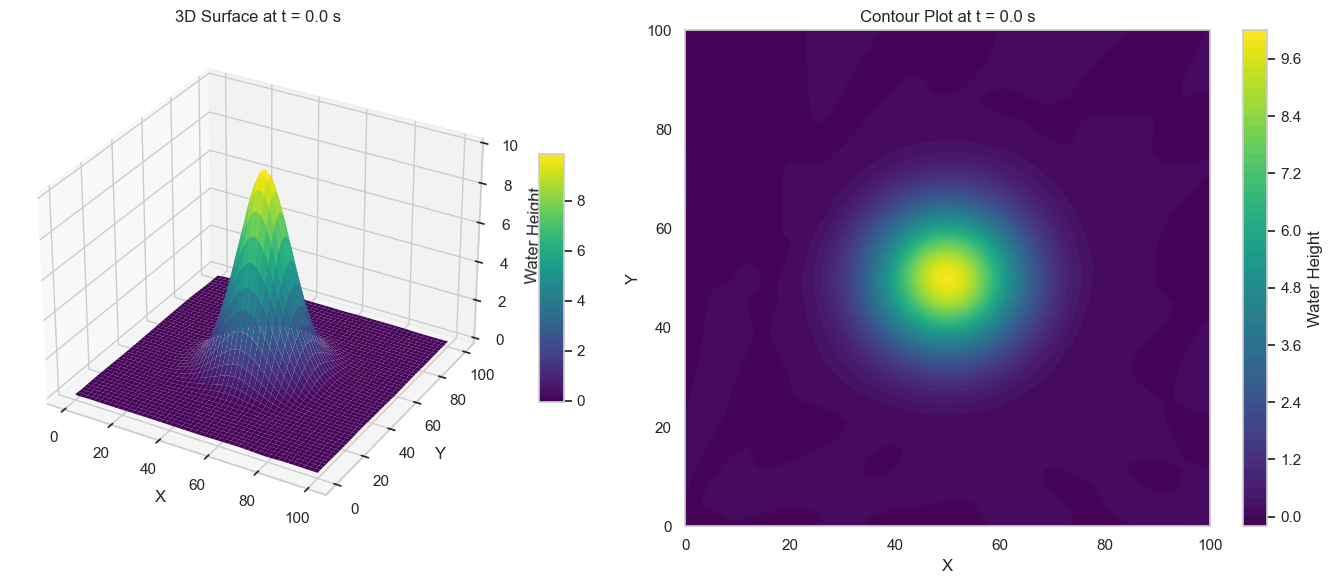

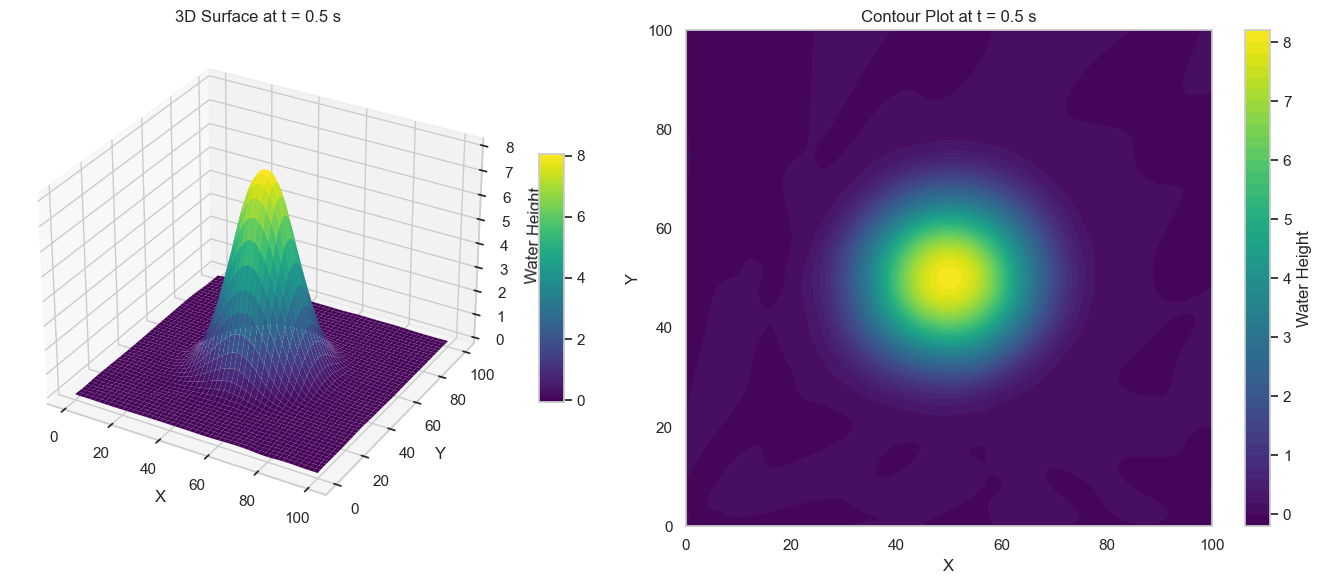

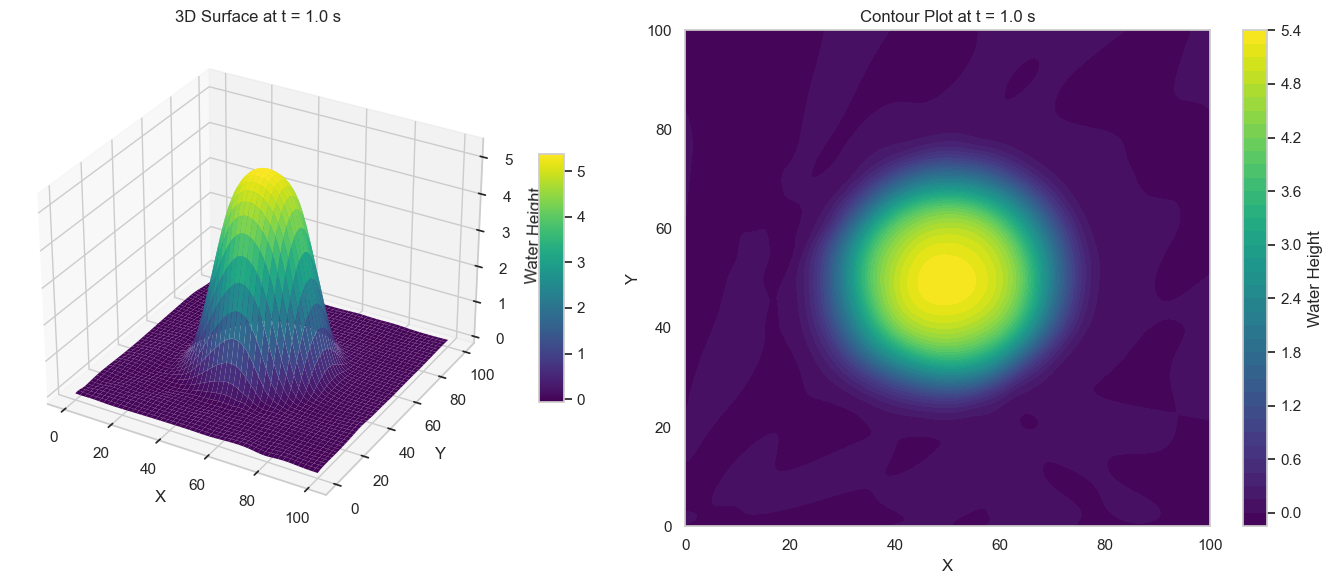

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# List of file names and their corresponding time values (for titles)
files = [
    ("Downloads/solution_outputs_gaussian/height_gaussian_t0.00.csv", 0.0),
    ("Downloads/solution_outputs_gaussian/height_gaussian_t0.50.csv", 0.5),
    ("Downloads/solution_outputs_gaussian/height_gaussian_t1.00.csv", 1.0)
]

for file_path, time_val in files:
    Z = pd.read_csv(file_path).values
    N_y, N_x = Z.shape
    x = np.linspace(0, 100, N_x)
    y = np.linspace(0, 100, N_y)
    X, Y = np.meshgrid(x, y)

    center_y_idx = np.argmin(np.abs(y - 50))
    centerline = Z[center_y_idx, :]

    fig = plt.figure(figsize=(14, 6))

    # 3D surface plot
    ax1 = fig.add_subplot(121, projection='3d')
    surf = ax1.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Water Height')
    ax1.set_title(f"3D Surface at t = {time_val:.1f} s")
    fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=10)

    # 2D contour plot (heatmap)
    ax2 = fig.add_subplot(122)
    contour = ax2.contourf(X, Y, Z, levels=50, cmap='viridis')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_title(f"Contour Plot at t = {time_val:.1f} s")
    fig.colorbar(contour, ax=ax2, label='Water Height')

    plt.tight_layout()
    plt.show()

# Numerical Gaussian results

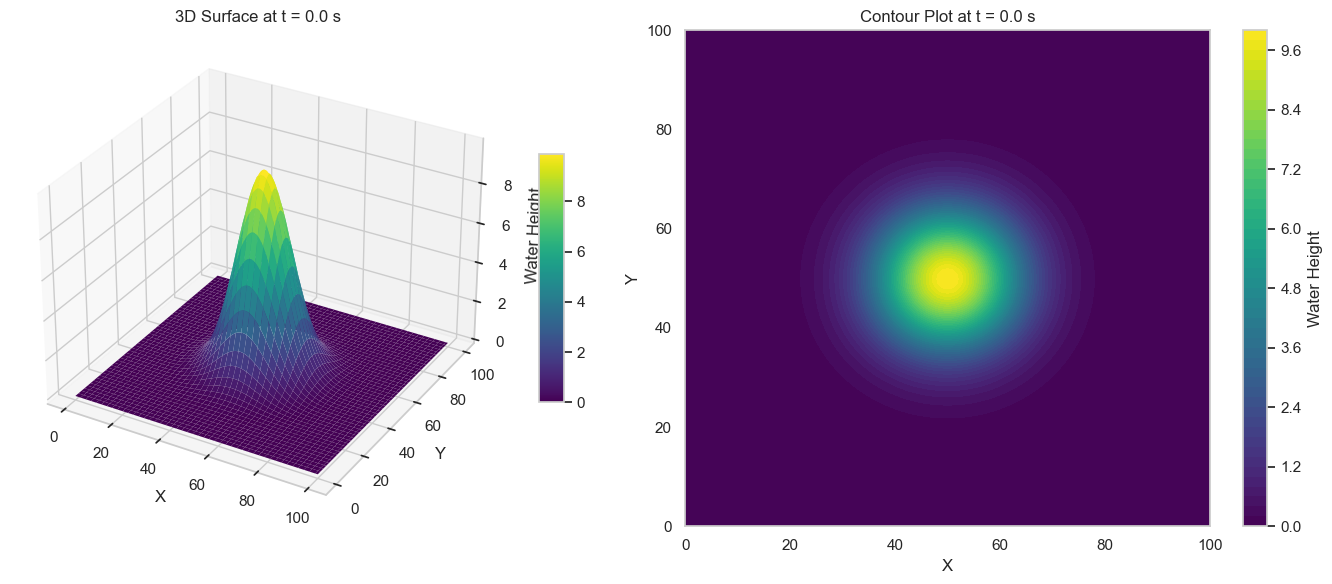

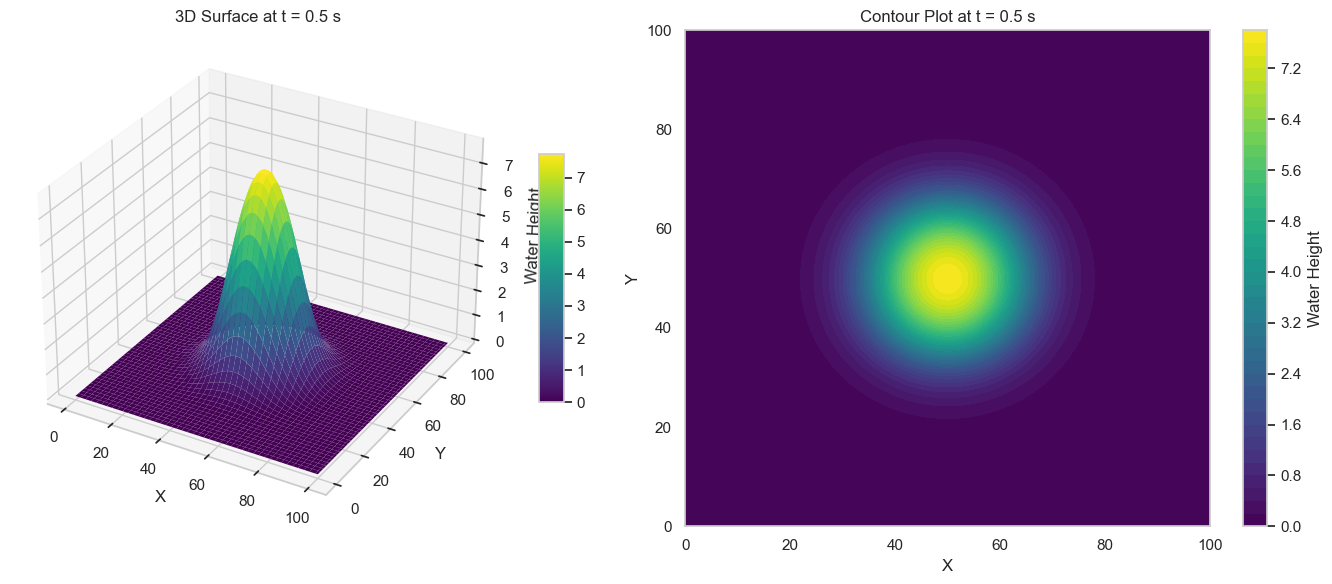

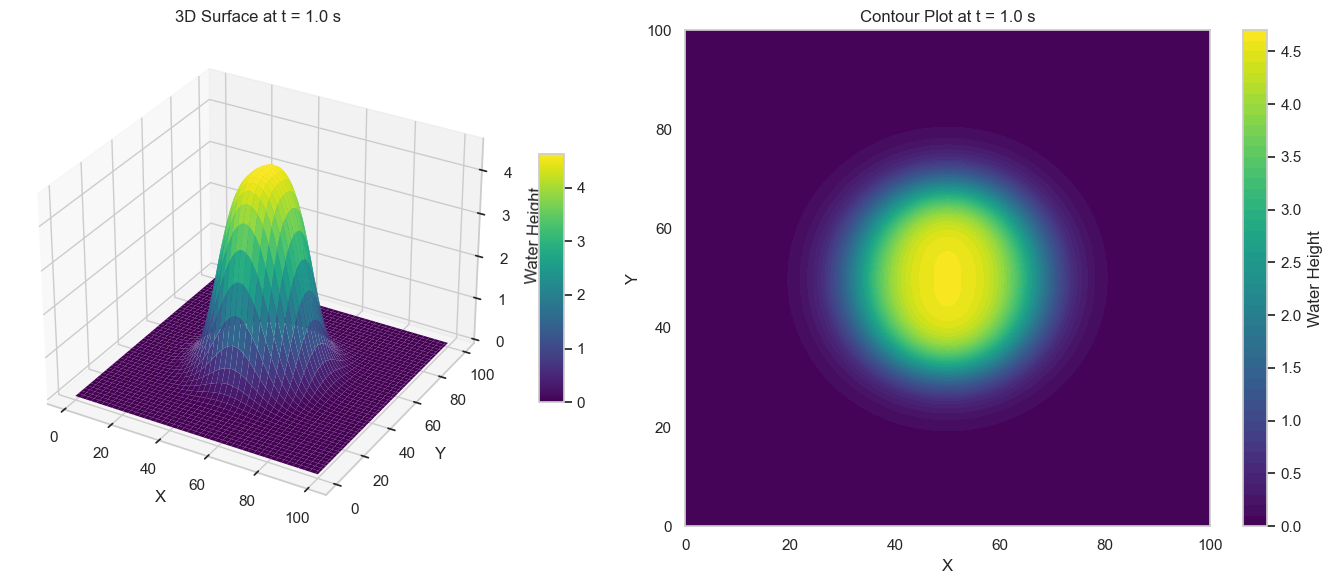

In [56]:
files = [
    ("Downloads/solution_outputs_gaussian_numerical/gaussian_t0.0000.csv", 0.0),
    ("Downloads/solution_outputs_gaussian_numerical/gaussian_t0.5000.csv", 0.5),
    ("Downloads/solution_outputs_gaussian_numerical/gaussian_t1.0000.csv", 1.0)
]

for file_path, time_val in files:
    Z = pd.read_csv(file_path).values
    N_y, N_x = Z.shape
    x = np.linspace(0, 100, N_x)
    y = np.linspace(0, 100, N_y)
    X, Y = np.meshgrid(x, y)

    center_y_idx = np.argmin(np.abs(y - 50))
    centerline = Z[center_y_idx, :]

    fig = plt.figure(figsize=(14, 6))

    # 3D surface plot
    ax1 = fig.add_subplot(121, projection='3d')
    surf = ax1.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Water Height')
    ax1.set_title(f"3D Surface at t = {time_val:.1f} s")
    fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=10)

    # 2D contour plot (heatmap)
    ax2 = fig.add_subplot(122)
    contour = ax2.contourf(X, Y, Z, levels=50, cmap='viridis')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_title(f"Contour Plot at t = {time_val:.1f} s")
    fig.colorbar(contour, ax=ax2, label='Water Height')

    plt.tight_layout()
    plt.show()

# Gaussian error distribution

RMSE between PINN and reference at t = 0.5s: 12.878036628862946


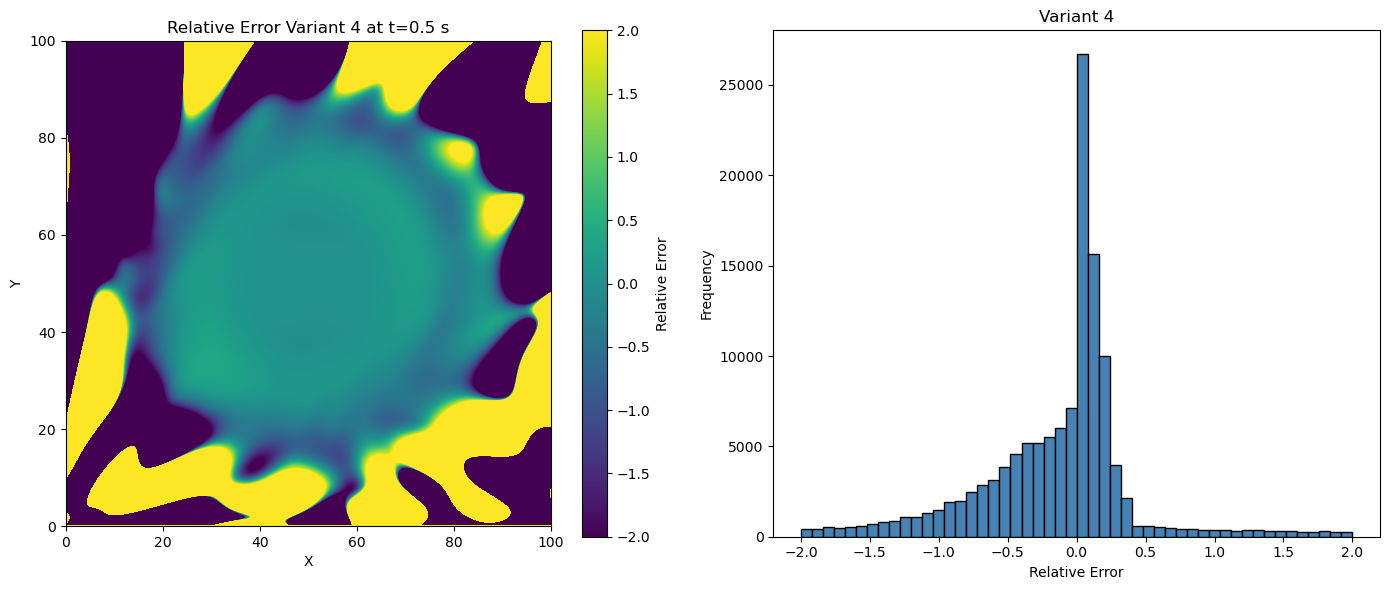

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator
# Load predicted height from PINN
pred = pd.read_csv("Downloads/solution_outputs_gaussian/height_gaussian_t0.50.csv", header=None).values

# Load reference solution
ref = pd.read_csv("Downloads/solution_outputs_gaussian_numerical/gaussian_t0.5000.csv", header=None).values


Ny, Nx = pred.shape
x_pred = np.linspace(0, 100, Nx)
y_pred = np.linspace(0, 100, Ny)

# Create meshgrid of predicted grid
X_pred, Y_pred = np.meshgrid(x_pred, y_pred)
coords = np.column_stack((Y_pred.ravel(), X_pred.ravel()))
# Define grid for reference (same domain assumed)
Ny_ref, Nx_ref = ref.shape
x_ref = np.linspace(0, 100, Nx_ref)
y_ref = np.linspace(0, 100, Ny_ref)

# Create interpolation function
interp_func = RegularGridInterpolator((y_ref, x_ref), ref, bounds_error=False, fill_value=None)

# 4. Interpolate reference values to prediction grid
ref_interp = interp_func(coords).reshape(pred.shape)

# 5. Now compute error
abs_error = np.abs(pred - ref_interp)

rel_error = np.where(ref_interp != 0, (pred - ref_interp) / ref_interp, 0)

# Compute RMSE
rmse = np.sqrt(np.mean((pred - ref_interp)**2))
print("RMSE between PINN and reference at t = 0.5s:", rmse)

#print("relative error:", rel_error)
#print("Max absolute error:", abs_error.max())

# Create combined figure
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# --- Plot 1: Heatmap of relative error ---
c1 = axs[0].imshow(rel_error, origin='lower', cmap='viridis', extent=[0, 100, 0, 100], vmin=-2, vmax=2)
fig.colorbar(c1, ax=axs[0], label='Relative Error')
axs[0].set_title("Relative Error Variant 4 at t=0.5 s")
axs[0].set_xlabel("X")
axs[0].set_ylabel("Y")

# --- Plot 2: Histogram of relative errors ---
flat_error = rel_error.ravel()
axs[1].hist(flat_error, bins=50, range=(-2, 2), color='steelblue', edgecolor='black')
axs[1].set_title("Variant 4")
axs[1].set_xlabel("Relative Error")
axs[1].set_ylabel("Frequency")

# Adjust layout and save
plt.tight_layout()
plt.savefig("error_plot_variant4.png", dpi=300)  # 🔽 Save as PNG
plt.show()


# Pinns Circular variant

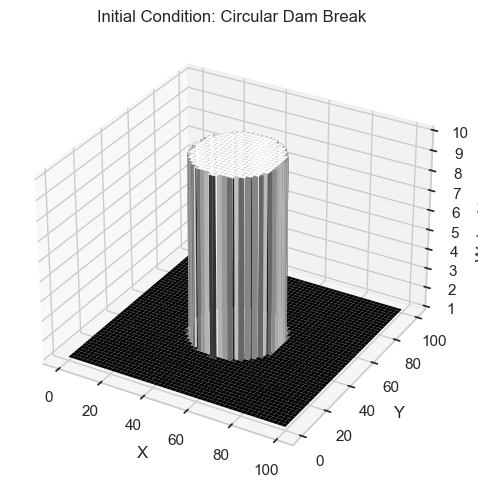

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def func_IC_h(x):
    center_x=50.0
    center_y=50.0
    radius=20
    return 10.0 * ((x[:, 0:1] - center_x) * (x[:, 0:1] - center_x) + \
                    (x[:, 1:2] - center_y) * (x[:, 1:2] - center_y) <= \
                        (radius*radius)) + \
            1.0 * ((x[:, 0:1] - center_x) * (x[:, 0:1] - center_x) + \
                  (x[:, 1:2] - center_y) * (x[:, 1:2] - center_y) > \
                      (radius*radius))

# Create grid
N = 500
X, Y = np.meshgrid(np.linspace(0, 100, N), np.linspace(0, 100, N))
XY = np.column_stack((X.ravel(), Y.ravel()))
T = np.zeros_like(XY[:, :1])
Q = np.hstack((XY, T))

# Evaluate initial condition
H = func_IC_h(Q).reshape(N, N)

# 3D surface plot
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, H, cmap='gray', edgecolor='none')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Water Height')
ax.set_title('Initial Condition: Circular Dam Break')
plt.tight_layout()
plt.show()


Loss

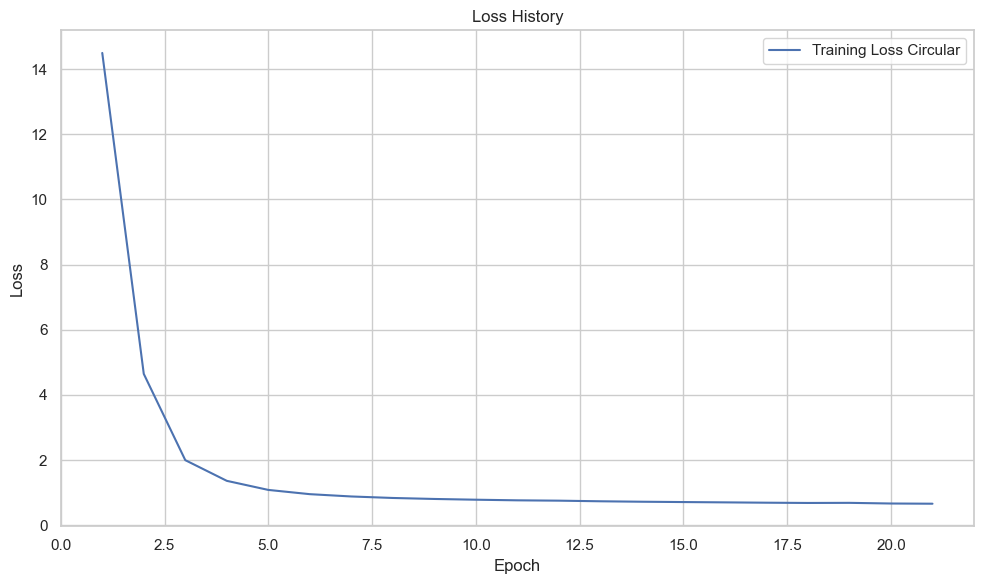

In [33]:
df4 = pd.read_csv("Downloads/solution_outputs_circular/training_loss_circular.csv")
plt.figure(figsize=(10, 6))

plt.plot(df4["Step"], df4["Loss"], label="Training Loss Circular")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss History")
plt.legend()
plt.tight_layout()
plt.show()

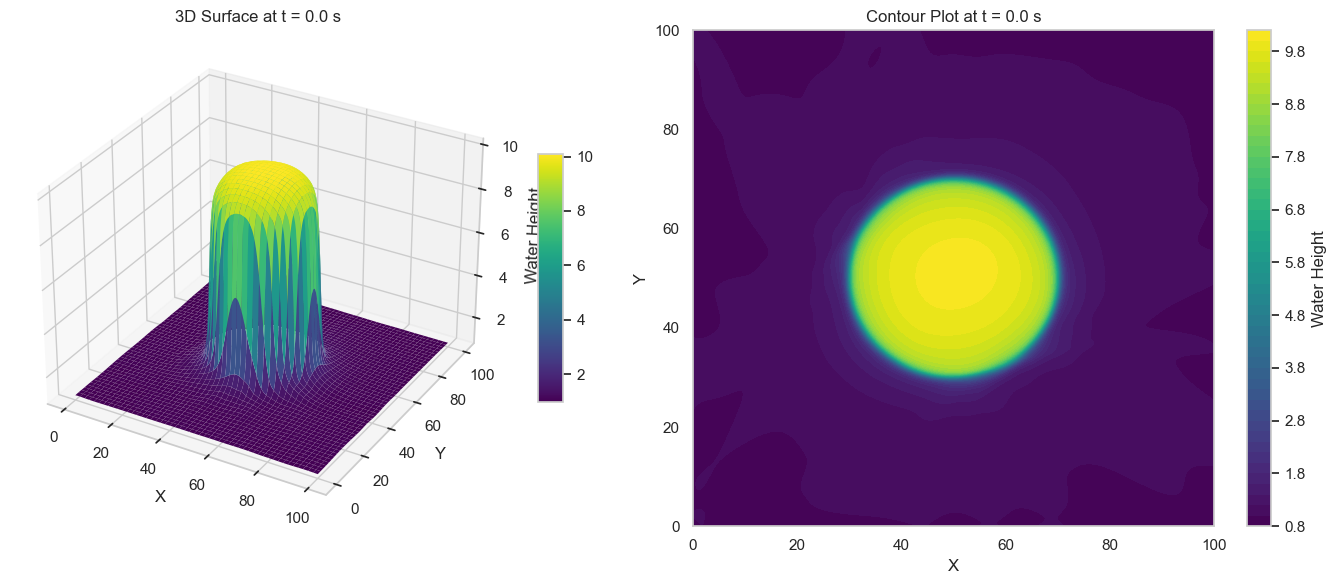

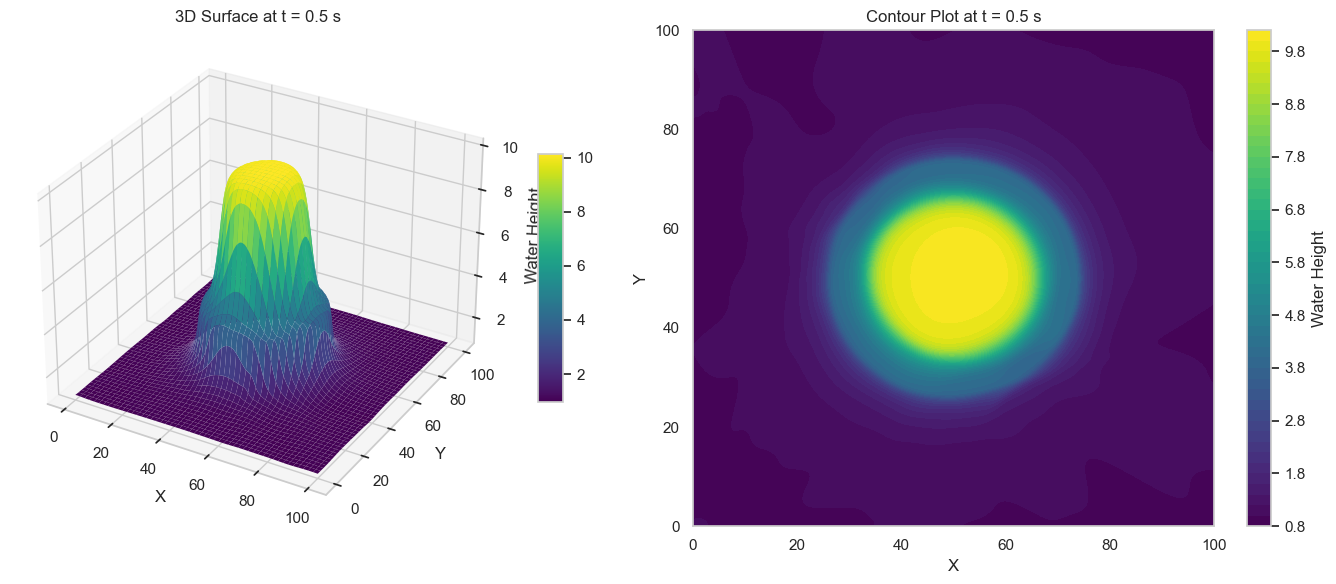

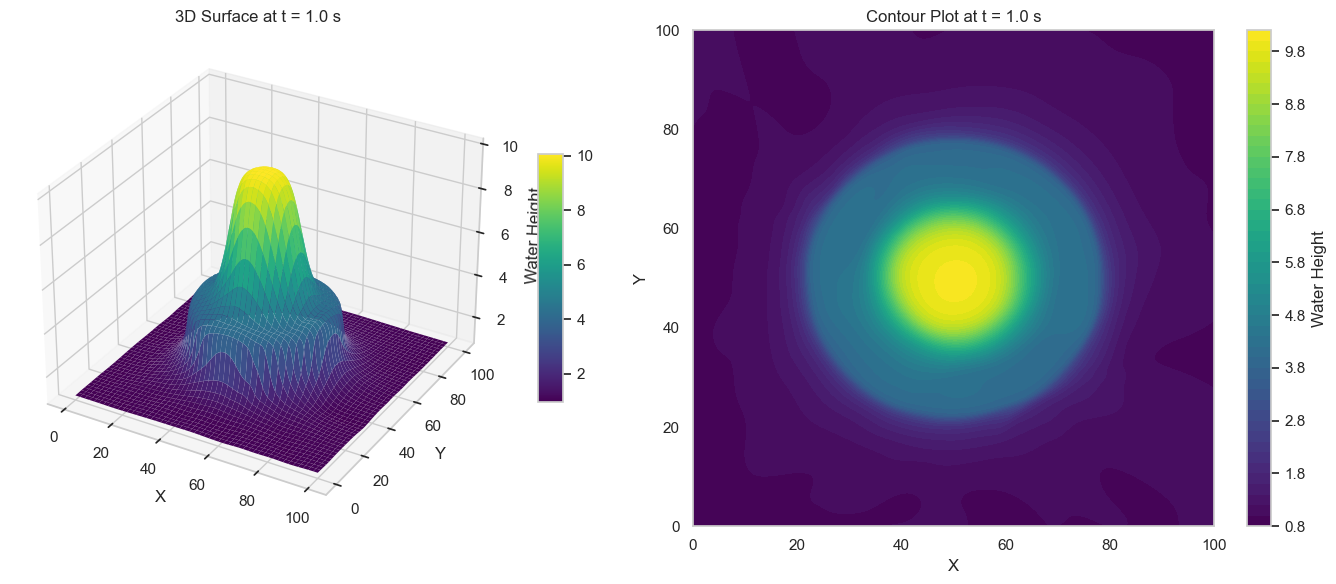

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# List of file names and their corresponding time values (for titles)
files = [
    ("Downloads/solution_outputs_circular/height_circular_t0.00.csv", 0.0),
    ("Downloads/solution_outputs_circular/height_circular_t0.50.csv", 0.5),
    ("Downloads/solution_outputs_circular/height_circular_t1.00.csv", 1.0)
]

for file_path, time_val in files:
    Z = pd.read_csv(file_path).values
    N_y, N_x = Z.shape
    x = np.linspace(0, 100, N_x)
    y = np.linspace(0, 100, N_y)
    X, Y = np.meshgrid(x, y)

    center_y_idx = np.argmin(np.abs(y - 50))
    centerline = Z[center_y_idx, :]

    fig = plt.figure(figsize=(14, 6))

    # 3D surface plot
    ax1 = fig.add_subplot(121, projection='3d')
    surf = ax1.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Water Height')
    ax1.set_title(f"3D Surface at t = {time_val:.1f} s")
    fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=10)

    # 2D contour plot (heatmap)
    ax2 = fig.add_subplot(122)
    contour = ax2.contourf(X, Y, Z, levels=50, cmap='viridis')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_title(f"Contour Plot at t = {time_val:.1f} s")
    fig.colorbar(contour, ax=ax2, label='Water Height')

    plt.tight_layout()
    plt.show()

# Circular Numerical results

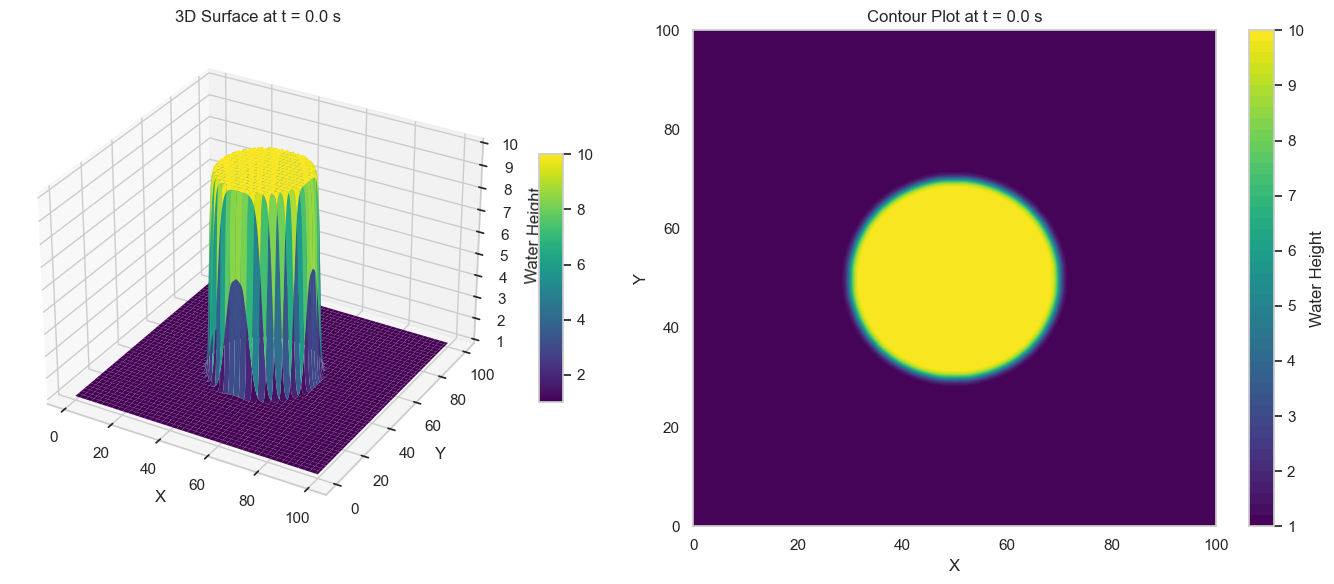

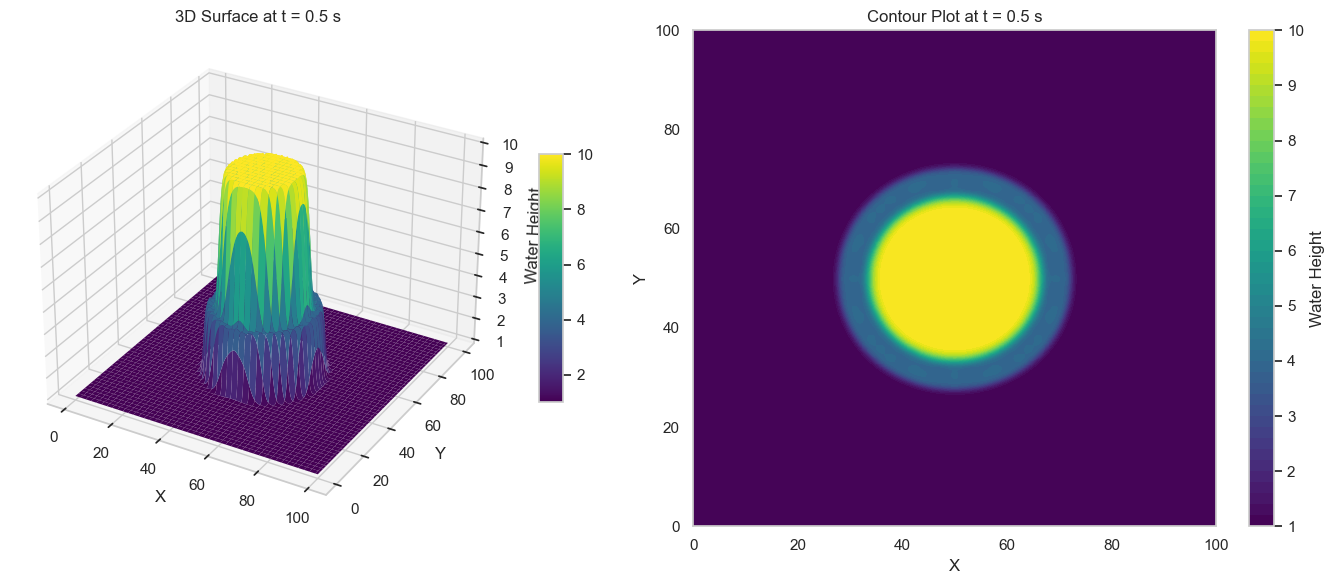

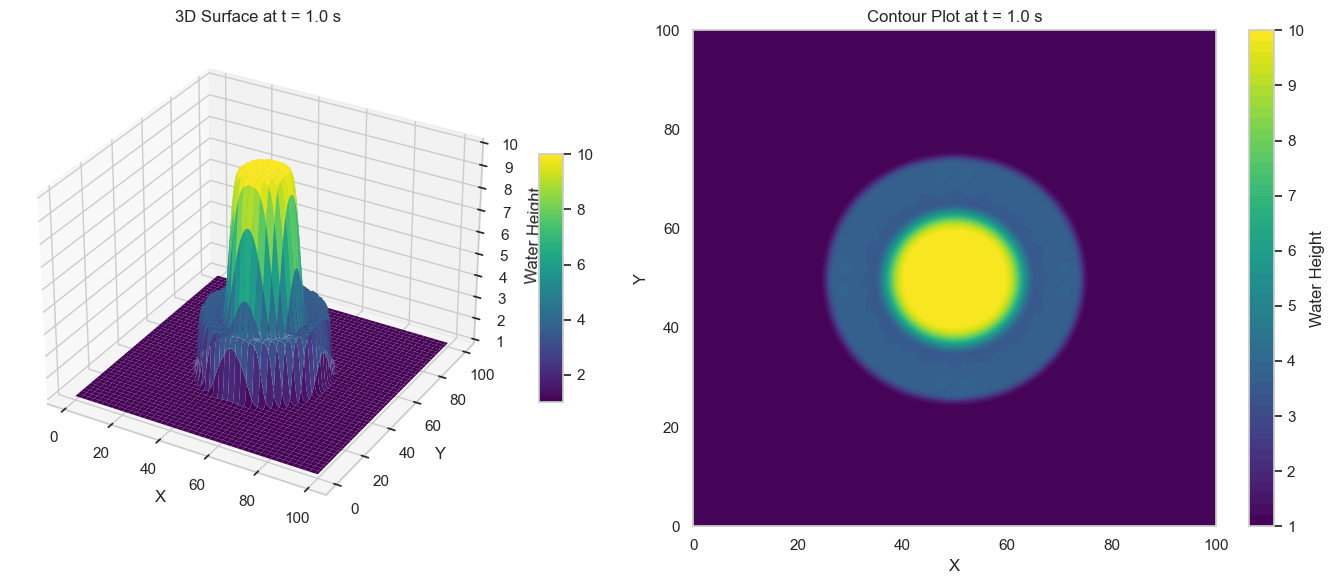

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# List of file names and their corresponding time values (for titles)
files = [
    ("Downloads/solution_outputs_numerical_circular/numerical_circular_t0.0000.csv", 0.0),
    ("Downloads/solution_outputs_numerical_circular/numerical_circular_t0.5000.csv", 0.5),
    ("Downloads/solution_outputs_numerical_circular/numerical_circular_t1.0000.csv", 1.0)
]

for file_path, time_val in files:
    Z = pd.read_csv(file_path).values
    N_y, N_x = Z.shape
    x = np.linspace(0, 100, N_x)
    y = np.linspace(0, 100, N_y)
    X, Y = np.meshgrid(x, y)

    center_y_idx = np.argmin(np.abs(y - 50))
    centerline = Z[center_y_idx, :]

    fig = plt.figure(figsize=(14, 6))

    # 3D surface plot
    ax1 = fig.add_subplot(121, projection='3d')
    surf = ax1.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Water Height')
    ax1.set_title(f"3D Surface at t = {time_val:.1f} s")
    fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=10)

    # 2D contour plot (heatmap)
    ax2 = fig.add_subplot(122)
    contour = ax2.contourf(X, Y, Z, levels=50, cmap='viridis')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_title(f"Contour Plot at t = {time_val:.1f} s")
    fig.colorbar(contour, ax=ax2, label='Water Height')

    plt.tight_layout()
    plt.show()

# Circular error distribution

RMSE between PINN and reference at t = 0.5s: 12.854231803443165


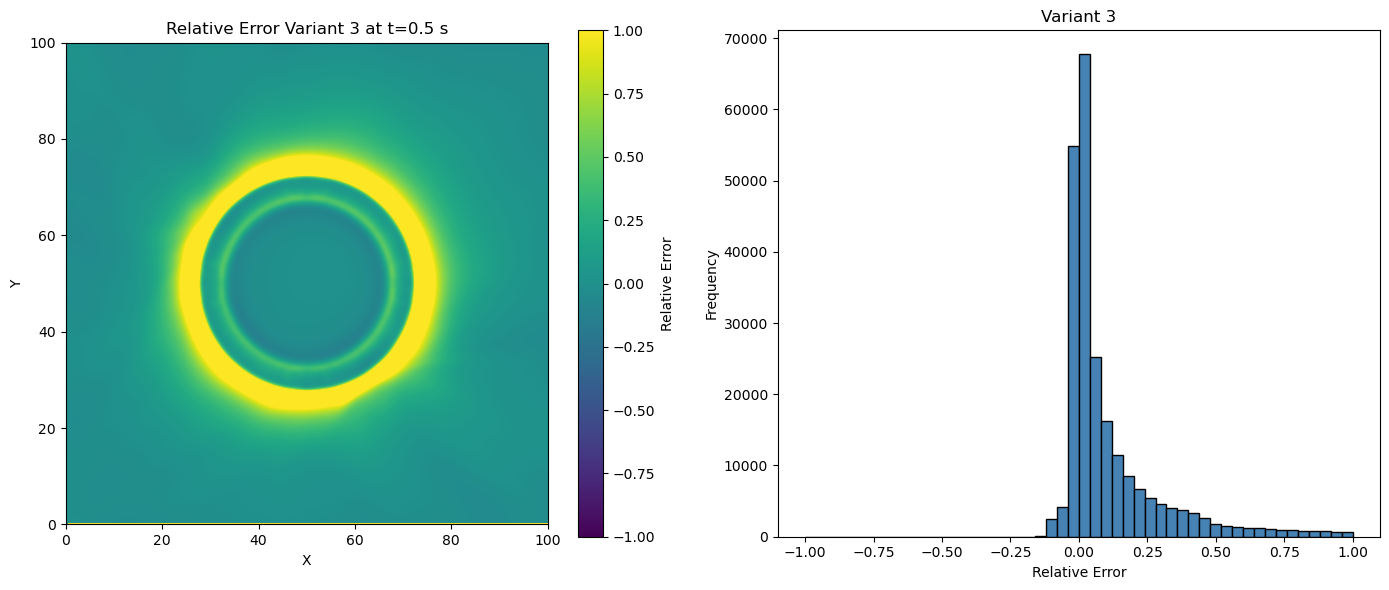

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator
# Load predicted height from PINN
pred = pd.read_csv("Downloads/solution_outputs_circular/height_circular_t0.50.csv", header=None).values

# Load reference solution
ref = pd.read_csv("Downloads/solution_outputs_numerical_circular/numerical_circular_t0.5000.csv", header=None).values


Ny, Nx = pred.shape
x_pred = np.linspace(0, 100, Nx)
y_pred = np.linspace(0, 100, Ny)

# Create meshgrid of predicted grid
X_pred, Y_pred = np.meshgrid(x_pred, y_pred)
coords = np.column_stack((Y_pred.ravel(), X_pred.ravel()))
# Define grid for reference (same domain assumed)
Ny_ref, Nx_ref = ref.shape
x_ref = np.linspace(0, 100, Nx_ref)
y_ref = np.linspace(0, 100, Ny_ref)

# Create interpolation function
interp_func = RegularGridInterpolator((y_ref, x_ref), ref, bounds_error=False, fill_value=None)

# 4. Interpolate reference values to prediction grid
ref_interp = interp_func(coords).reshape(pred.shape)

# 5. Now compute error
#abs_error = np.abs(pred - ref_interp)
rel_error = np.where(ref_interp != 0, (pred - ref_interp) / ref_interp, 0)

# Compute RMSE
rmse = np.sqrt(np.mean((pred - ref_interp)**2))
print("RMSE between PINN and reference at t = 0.5s:", rmse)

#print("relative error:", rel_error)
#print("Max absolute error:", abs_error.max())

# Create combined figure
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# --- Plot 1: Heatmap of relative error ---
c1 = axs[0].imshow(rel_error, origin='lower', cmap='viridis', extent=[0, 100, 0, 100], vmin=-1, vmax=1)
fig.colorbar(c1, ax=axs[0], label='Relative Error')
axs[0].set_title("Relative Error Variant 3 at t=0.5 s")
axs[0].set_xlabel("X")
axs[0].set_ylabel("Y")

# --- Plot 2: Histogram of relative errors ---
flat_error = rel_error.ravel()
axs[1].hist(flat_error, bins=50, range=(-1, 1), color='steelblue', edgecolor='black')
axs[1].set_title("Variant 3")
axs[1].set_xlabel("Relative Error")
axs[1].set_ylabel("Frequency")

# Adjust layout and save
plt.tight_layout()
plt.savefig("error_plot_variant3.png", dpi=300)  # 🔽 Save as PNG
plt.show()

# Pinns circular with initial numerical data

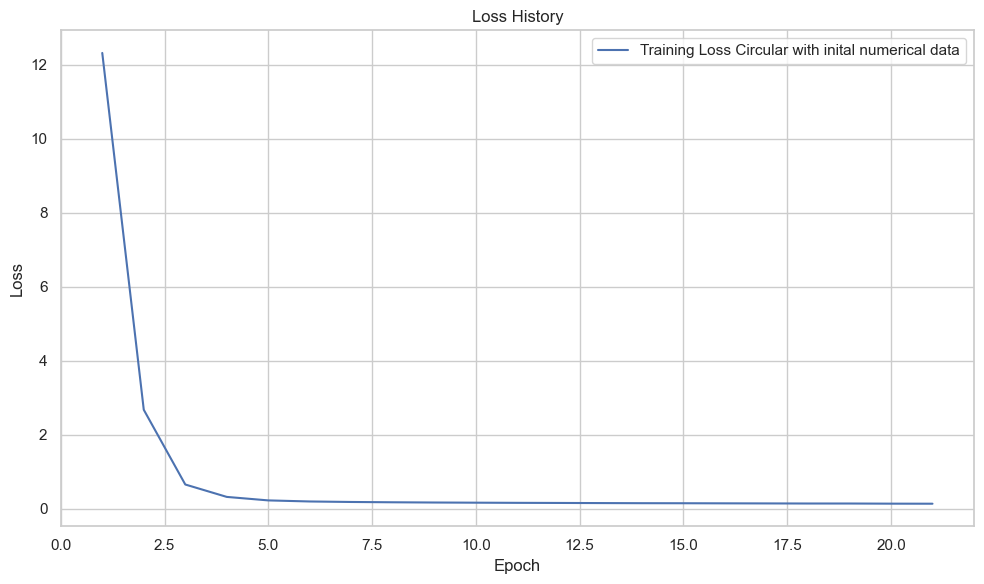

In [46]:
df5 = pd.read_csv("Downloads/solution_outputs_circularNum/training_loss_circularNum.csv")
plt.figure(figsize=(10, 6))

plt.plot(df5["Step"], df5["Loss"], label="Training Loss Circular with inital numerical data")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss History")
plt.legend()
plt.tight_layout()
plt.show()

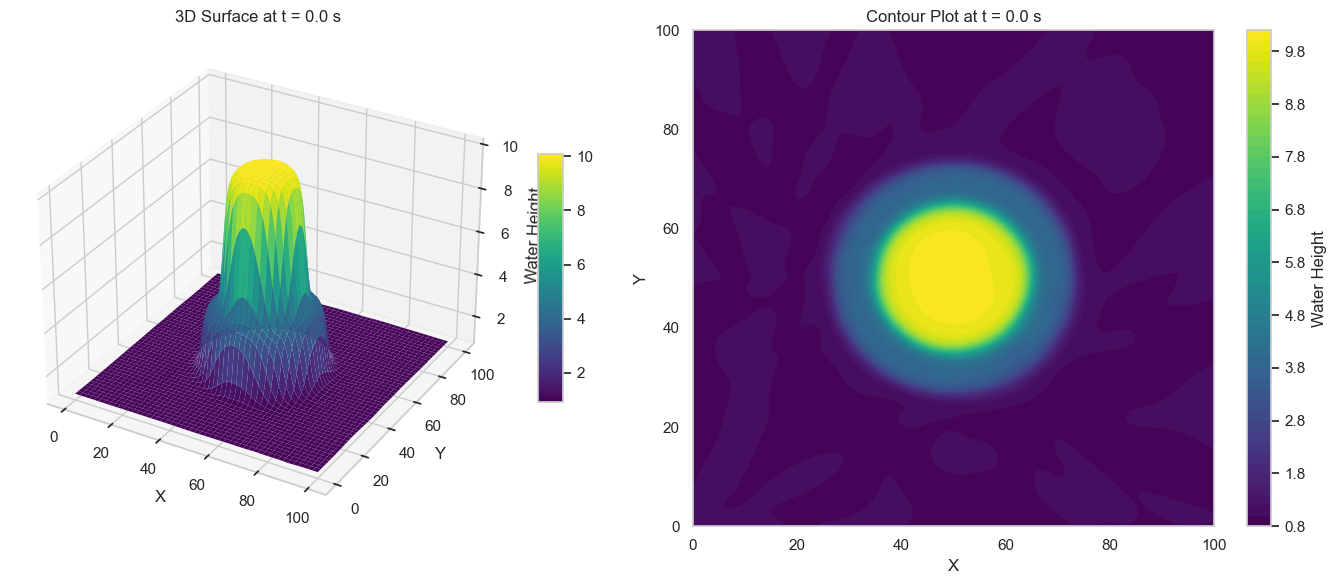

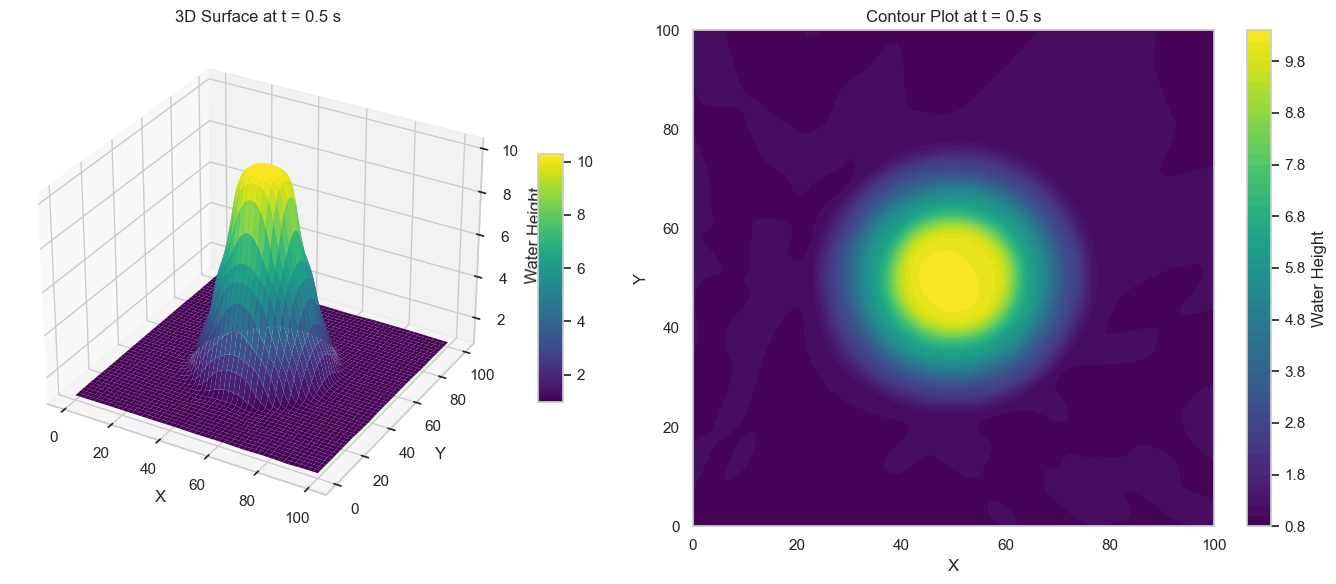

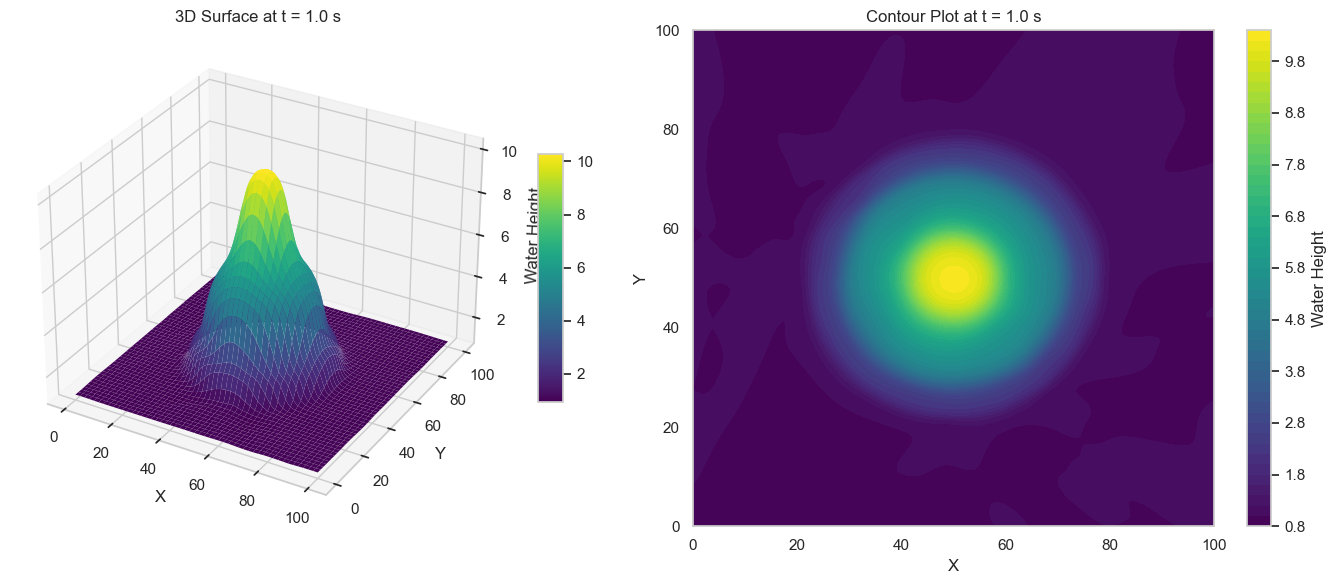

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# List of file names and their corresponding time values (for titles)
files = [
    ("Downloads/solution_outputs_circularNum/height_circularNum_t0.00.csv", 0.0),
    ("Downloads/solution_outputs_circularNum/height_circularNum_t0.50.csv", 0.5),
    ("Downloads/solution_outputs_circularNum/height_circularNum_t1.00.csv", 1.0)
]

for file_path, time_val in files:
    Z = pd.read_csv(file_path).values
    N_y, N_x = Z.shape
    x = np.linspace(0, 100, N_x)
    y = np.linspace(0, 100, N_y)
    X, Y = np.meshgrid(x, y)

    center_y_idx = np.argmin(np.abs(y - 50))
    centerline = Z[center_y_idx, :]

    fig = plt.figure(figsize=(14, 6))

    # 3D surface plot
    ax1 = fig.add_subplot(121, projection='3d')
    surf = ax1.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Water Height')
    ax1.set_title(f"3D Surface at t = {time_val:.1f} s")
    fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=10)

    # 2D contour plot (heatmap)
    ax2 = fig.add_subplot(122)
    contour = ax2.contourf(X, Y, Z, levels=50, cmap='viridis')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_title(f"Contour Plot at t = {time_val:.1f} s")
    fig.colorbar(contour, ax=ax2, label='Water Height')

    plt.tight_layout()
    plt.show()

# Numerical results circular with initial at t=0.7

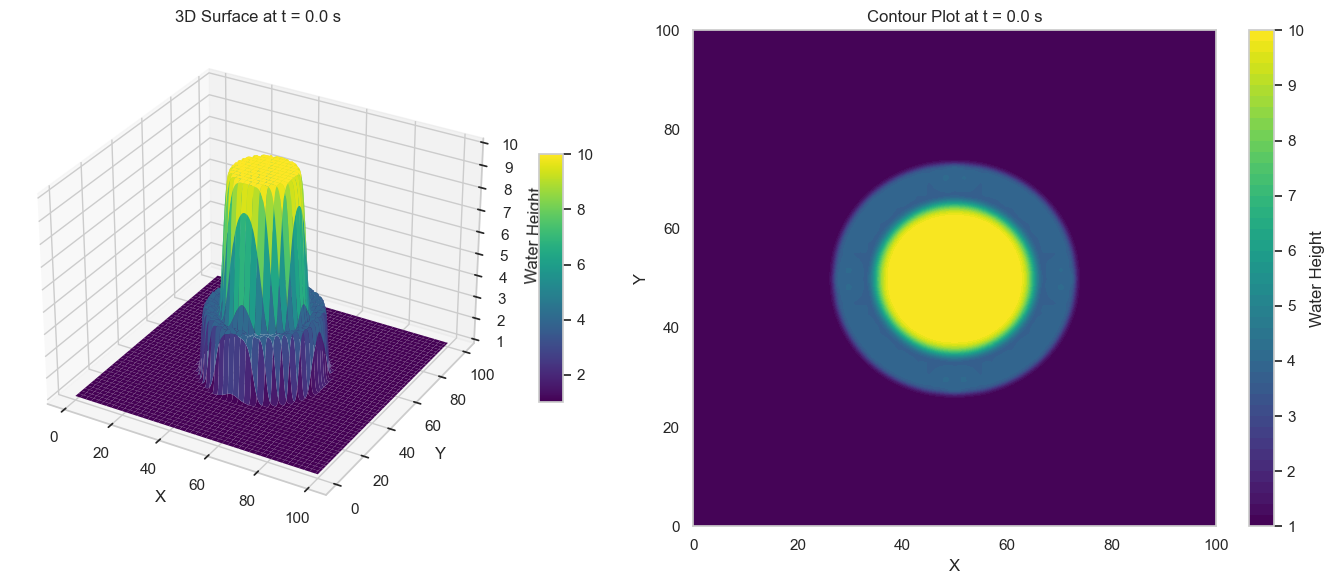

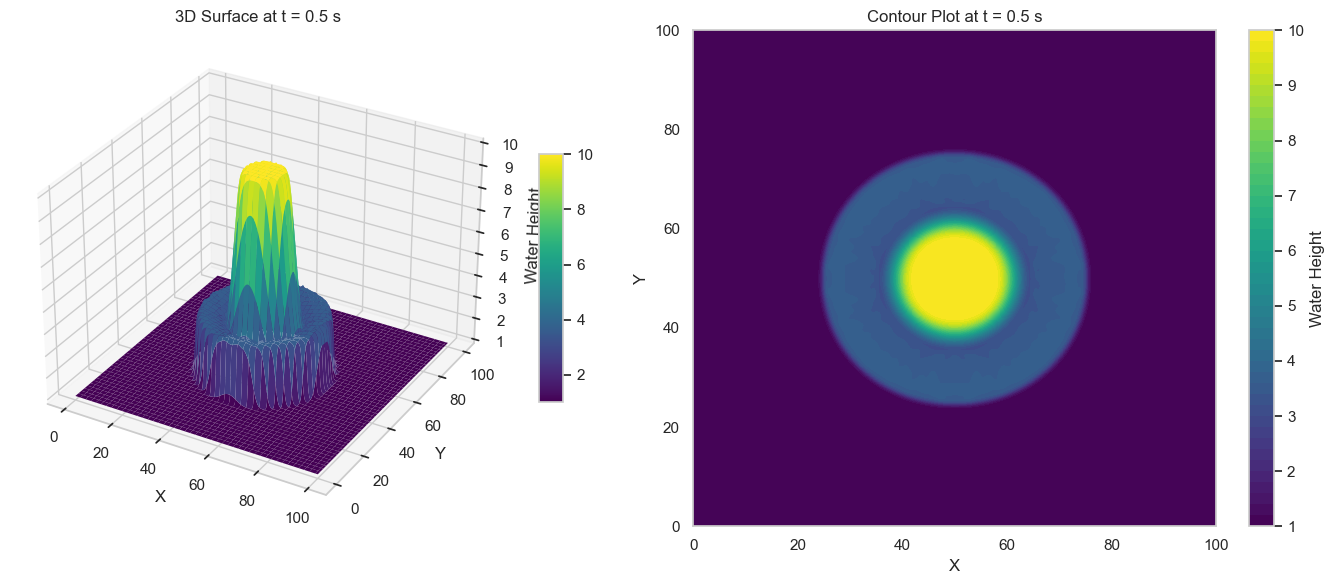

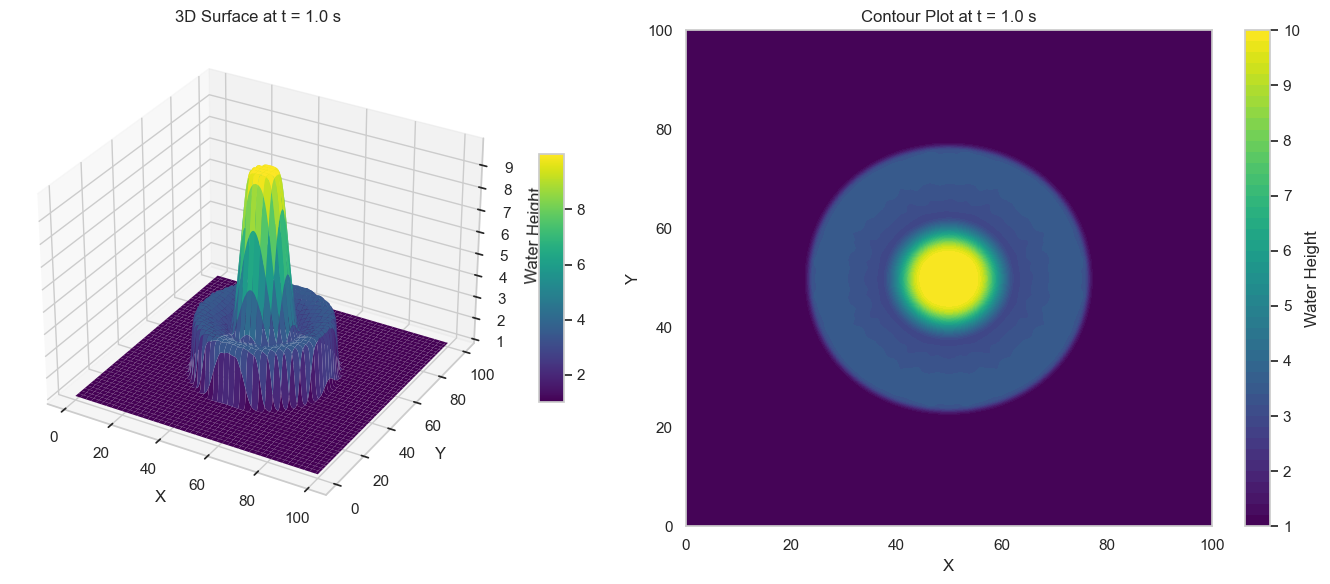

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# List of file names and their corresponding time values (for titles)
files = [
    ("Downloads/solution_outputs_numerical_circular/numerical_circular_t0.6999.csv", 0.0),
    ("Downloads/solution_outputs_numerical_circular/numerical_circular_t1.1999.csv", 0.5),
    ("Downloads/solution_outputs_numerical_circular/numerical_circular_t1.5000.csv", 1.0)
]

for file_path, time_val in files:
    Z = pd.read_csv(file_path).values
    N_y, N_x = Z.shape
    x = np.linspace(0, 100, N_x)
    y = np.linspace(0, 100, N_y)
    X, Y = np.meshgrid(x, y)

    center_y_idx = np.argmin(np.abs(y - 50))
    centerline = Z[center_y_idx, :]

    fig = plt.figure(figsize=(14, 6))

    # 3D surface plot
    ax1 = fig.add_subplot(121, projection='3d')
    surf = ax1.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Water Height')
    ax1.set_title(f"3D Surface at t = {time_val:.1f} s")
    fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=10)

    # 2D contour plot (heatmap)
    ax2 = fig.add_subplot(122)
    contour = ax2.contourf(X, Y, Z, levels=50, cmap='viridis')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_title(f"Contour Plot at t = {time_val:.1f} s")
    fig.colorbar(contour, ax=ax2, label='Water Height')

    plt.tight_layout()
    plt.show()

# Hybrid Circular error distribution

RMSE between PINN and reference at t = 0.5s: 12.861159826698268


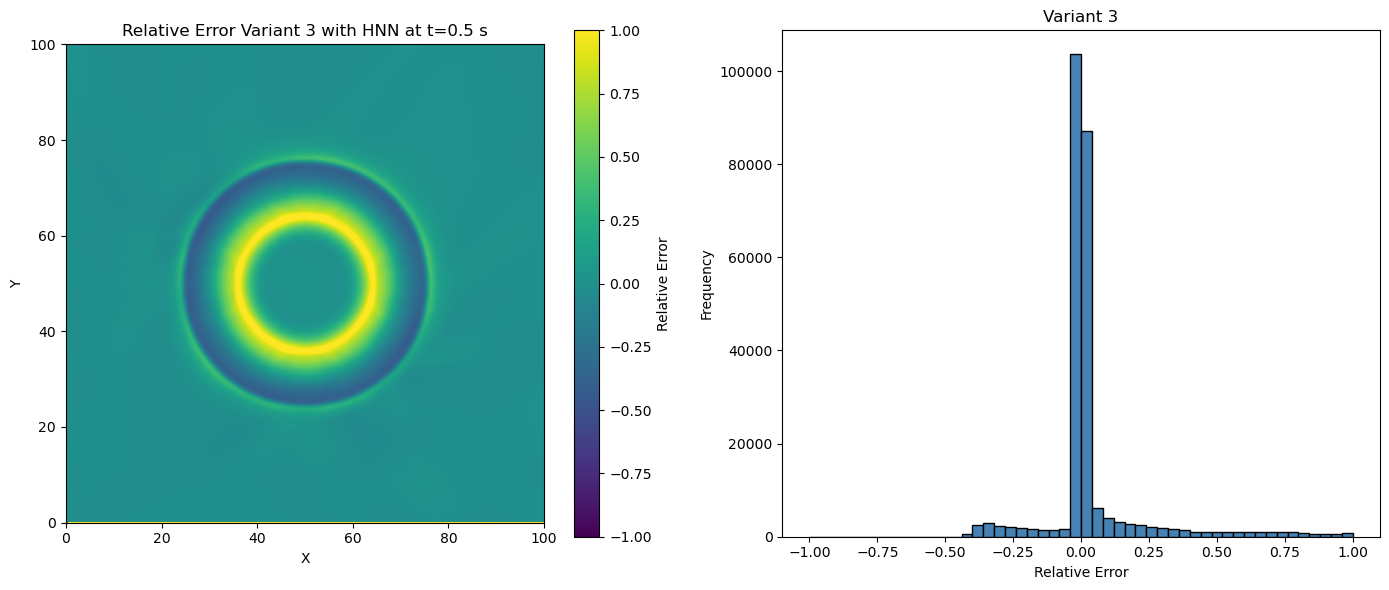

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator
# Load predicted height from PINN
pred = pd.read_csv("Downloads/solution_outputs_circularNum/height_circularNum_t0.50.csv", header=None).values

# Load reference solution
ref = pd.read_csv("Downloads/solution_outputs_numerical_circular/numerical_circular_t1.1999.csv", header=None).values

Ny, Nx = pred.shape
x_pred = np.linspace(0, 100, Nx)
y_pred = np.linspace(0, 100, Ny)

# Create meshgrid of predicted grid
X_pred, Y_pred = np.meshgrid(x_pred, y_pred)
coords = np.column_stack((Y_pred.ravel(), X_pred.ravel()))
# Define grid for reference (same domain assumed)
Ny_ref, Nx_ref = ref.shape
x_ref = np.linspace(0, 100, Nx_ref)
y_ref = np.linspace(0, 100, Ny_ref)

# Create interpolation function
interp_func = RegularGridInterpolator((y_ref, x_ref), ref, bounds_error=False, fill_value=None)

# 4. Interpolate reference values to prediction grid
ref_interp = interp_func(coords).reshape(pred.shape)

# 5. Now compute error
abs_error = np.abs(pred - ref_interp)
rel_error = np.where(ref_interp != 0, (pred - ref_interp) / (ref_interp) , 0)
# Compute RMSE
rmse = np.sqrt(np.mean((pred - ref_interp)**2))
print("RMSE between PINN and reference at t = 0.5s:", rmse)

# Create combined figure
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# --- Plot 1: Heatmap of relative error ---
c1 = axs[0].imshow(rel_error, origin='lower', cmap='viridis', extent=[0, 100, 0, 100], vmin=-1, vmax=1)
fig.colorbar(c1, ax=axs[0], label='Relative Error')
axs[0].set_title("Relative Error Variant 3 with HNN at t=0.5 s")
axs[0].set_xlabel("X")
axs[0].set_ylabel("Y")

# --- Plot 2: Histogram of relative errors ---
flat_error = rel_error.ravel()
axs[1].hist(flat_error, bins=50, range=(-1, 1), color='steelblue', edgecolor='black')
axs[1].set_title("Variant 3")
axs[1].set_xlabel("Relative Error")
axs[1].set_ylabel("Frequency")

# Adjust layout and save
plt.tight_layout()
plt.savefig("error_plot_variant3HNN.png", dpi=300)  # 🔽 Save as PNG
plt.show()